<a href="https://colab.research.google.com/github/GeorgeM2000/Life-Expectancy-Analysis/blob/main/Life_Expectancy_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [1]:
install.packages("readxl")
install.packages("ggplot2")
install.packages("readr")
install.packages("writexl")
install.packages("psych")
install.packages("dplyr")
install.packages("car")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘mnormt’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘Rcpp’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’




# Dataset and Data Exploration

In [2]:
library(readxl)
library(ggplot2)
library(dplyr)
library(readr)
library(writexl)
library(psych)
library(car)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha


Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:psych’:

    logit


The following object is masked from ‘package:dplyr’:

    recode




In [32]:
le <- read_excel('Life Expectancy Data.xlsx')

In [ ]:
head(le)

Country,Year,Status,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,⋯,Polio,Total Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income Composition of Resources,Schooling
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,2015,Developing,65.0,263,62,0.01,71.279624,65,1154,⋯,6,8.16,65,0.1,584.25921,33736494,17.2,17.3,0.479,10.1
Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,62,492,⋯,58,8.18,62,0.1,612.69651,327582,17.5,17.5,0.476,10.0
Afghanistan,2013,Developing,59.9,268,66,0.01,73.219243,64,430,⋯,62,8.13,64,0.1,631.74498,31731688,17.7,17.7,0.470,9.9
Afghanistan,2012,Developing,59.5,272,69,0.01,78.184215,67,2787,⋯,67,8.52,67,0.1,669.95900,3696958,17.9,18.0,0.463,9.8
Afghanistan,2011,Developing,59.2,275,71,0.01,7.097109,68,3013,⋯,68,7.87,68,0.1,63.53723,2978599,18.2,18.2,0.454,9.5
Afghanistan,2010,Developing,58.8,279,74,0.01,79.679367,66,1989,⋯,66,9.20,66,0.1,553.32894,2883167,18.4,18.4,0.448,9.2


In [ ]:
# Display the structure of the dataset
str(le)

tibble [2,938 × 22] (S3: tbl_df/tbl/data.frame)
 $ Country                        : chr [1:2938] "Afghanistan" "Afghanistan" "Afghanistan" "Afghanistan" ...
 $ Year                           : num [1:2938] 2015 2014 2013 2012 2011 ...
 $ Status                         : chr [1:2938] "Developing" "Developing" "Developing" "Developing" ...
 $ Life Expectancy                : num [1:2938] 65 59.9 59.9 59.5 59.2 58.8 58.6 58.1 57.5 57.3 ...
 $ Adult Mortality                : num [1:2938] 263 271 268 272 275 279 281 287 295 295 ...
 $ Infant Deaths                  : num [1:2938] 62 64 66 69 71 74 77 80 82 84 ...
 $ Alcohol                        : num [1:2938] 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.03 0.02 0.03 ...
 $ Percentage Expenditure         : num [1:2938] 71.3 73.5 73.2 78.2 7.1 ...
 $ Hepatitis B                    : num [1:2938] 65 62 64 67 68 66 63 64 63 64 ...
 $ Measles                        : num [1:2938] 1154 492 430 2787 3013 ...
 $ BMI                            : num [1:2

In [ ]:
print(length(unique(le$Alcohol)))
print(length(unique(le$`Percentage Expenditure`)))
print(length(unique(le$`HIV/AIDS`)))
print(length(unique(le$`Thinness  1-19 years`)))
print(length(unique(le$`Thinness 5-9 years`)))
print(length(unique(le$`Income Composition of Resources`)))

[1] 1077
[1] 2328
[1] 200
[1] 201
[1] 208
[1] 626


In [ ]:
# Summary of the dataset
summary(le)

   Country               Year         Status          Life Expectancy
 Length:2938        Min.   :2000   Length:2938        Min.   :36.30  
 Class :character   1st Qu.:2004   Class :character   1st Qu.:63.10  
 Mode  :character   Median :2008   Mode  :character   Median :72.10  
                    Mean   :2008                      Mean   :69.22  
                    3rd Qu.:2012                      3rd Qu.:75.70  
                    Max.   :2015                      Max.   :89.00  
                                                      NA's   :10     
 Adult Mortality Infant Deaths       Alcohol        Percentage Expenditure
 Min.   :  1.0   Min.   :   0.0   Min.   : 0.0100   Min.   :    0.000     
 1st Qu.: 74.0   1st Qu.:   0.0   1st Qu.: 0.8775   1st Qu.:    4.685     
 Median :144.0   Median :   3.0   Median : 3.7550   Median :   64.913     
 Mean   :164.8   Mean   :  30.3   Mean   : 4.6029   Mean   :  738.251     
 3rd Qu.:228.0   3rd Qu.:  22.0   3rd Qu.: 7.7025   3rd Qu.:  441

In [ ]:
# Display the number of missing values for each feature
print(colSums(is.na(le)))

                        Country                            Year 
                              0                               0 
                         Status                 Life Expectancy 
                              0                              10 
                Adult Mortality                   Infant Deaths 
                             10                               0 
                        Alcohol          Percentage Expenditure 
                            194                               0 
                    Hepatitis B                         Measles 
                            553                               0 
                            BMI               Under-five Deaths 
                             34                               0 
                          Polio               Total Expenditure 
                             19                             226 
                     Diphtheria                        HIV/AIDS 
                         

In [33]:
le$Schooling <- cut(le$Schooling,
                    breaks= c(-Inf, 8, 12, Inf),
                    labels = c("Low", "Medium", "High"))

In [34]:
le$Status <- factor(le$Status)
# 1 for Developed and 2 for Developing Countries

In [ ]:
str(le)

tibble [2,938 × 22] (S3: tbl_df/tbl/data.frame)
 $ Country                        : chr [1:2938] "Afghanistan" "Afghanistan" "Afghanistan" "Afghanistan" ...
 $ Year                           : num [1:2938] 2015 2014 2013 2012 2011 ...
 $ Status                         : num [1:2938] 1 1 1 1 1 1 1 1 1 1 ...
 $ Life Expectancy                : num [1:2938] 65 59.9 59.9 59.5 59.2 58.8 58.6 58.1 57.5 57.3 ...
 $ Adult Mortality                : num [1:2938] 263 271 268 272 275 279 281 287 295 295 ...
 $ Infant Deaths                  : num [1:2938] 62 64 66 69 71 74 77 80 82 84 ...
 $ Alcohol                        : num [1:2938] 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.03 0.02 0.03 ...
 $ Percentage Expenditure         : num [1:2938] 71.3 73.5 73.2 78.2 7.1 ...
 $ Hepatitis B                    : num [1:2938] 65 62 64 67 68 66 63 64 63 64 ...
 $ Measles                        : num [1:2938] 1154 492 430 2787 3013 ...
 $ BMI                            : num [1:2938] 19.1 18.6 18.1 17.6 17.2 16

In [35]:
names(le)[names(le) == "Thinness  1-19 years"] <- "ThinnessAyears"
names(le)[names(le) == "Thinness 5-9 years"] <- "ThinnessByears"

## Categorical Feature Exploration

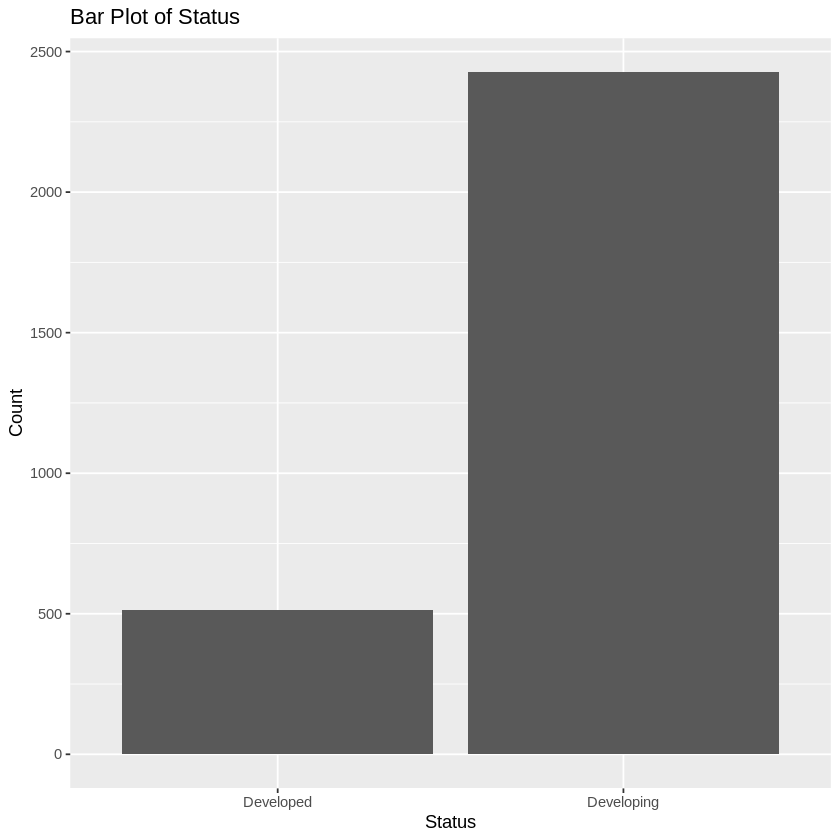

In [ ]:
# Bar plot for Status
ggplot(le, aes(x = Status)) +
  geom_bar() +
  labs(title = "Bar Plot of Status", x = "Status", y = "Count")

In [ ]:
print(table(le$Status))


 Developed Developing 
       512       2426 


In [ ]:
print(prop.table(table(le$Status)))


 Developed Developing 
 0.1742682  0.8257318 


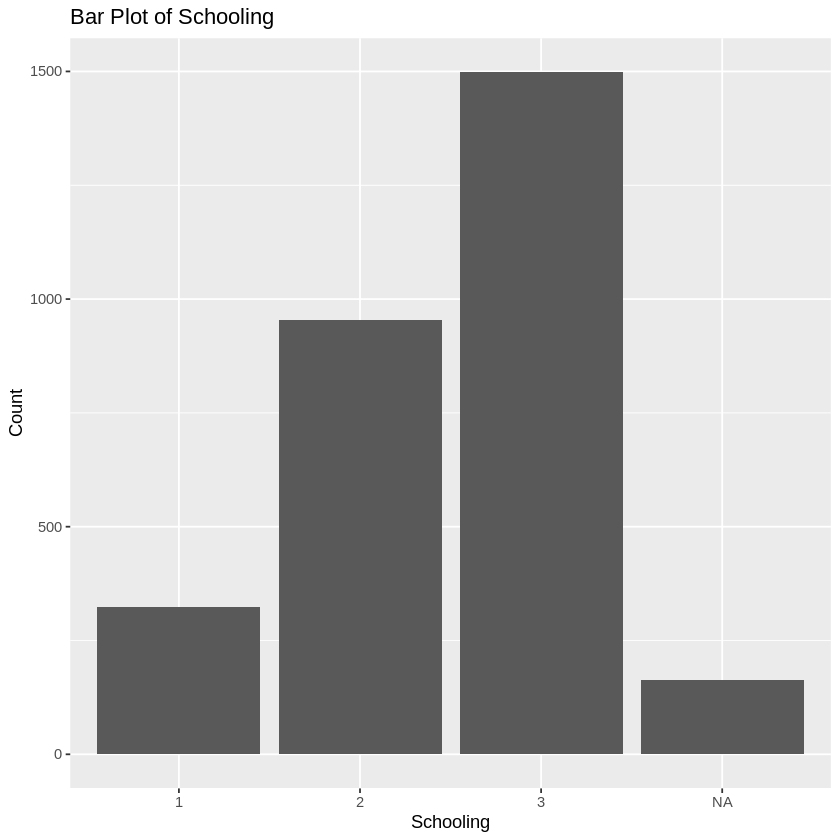

In [ ]:
# Bar plot for Status
ggplot(le, aes(x = Schooling)) +
  geom_bar() +
  labs(title = "Bar Plot of Schooling", x = "Schooling", y = "Count")

In [ ]:
print(table(le$Schooling))


   1    2    3 
 323  954 1498 


In [ ]:
print(prop.table(table(le$Schooling)))


        1         2         3 
0.1163964 0.3437838 0.5398198 


In [ ]:
print(le %>%
  filter(Status %in% c('Developed', 'Developing')) %>%
  group_by(Status, Schooling) %>%
  summarise(count = n()))

`summarise()` has grouped output by 'Status'. You can override using the
`.groups` argument.


# A tibble: 7 × 3
# Groups:   Status [2]
  Status     Schooling count
  <fct>      <fct>     <int>
1 Developed  2             3
2 Developed  3           461
3 Developed  NA           48
4 Developing 1           323
5 Developing 2           951
6 Developing 3          1037
7 Developing NA          115


## Continuous Features Exploration

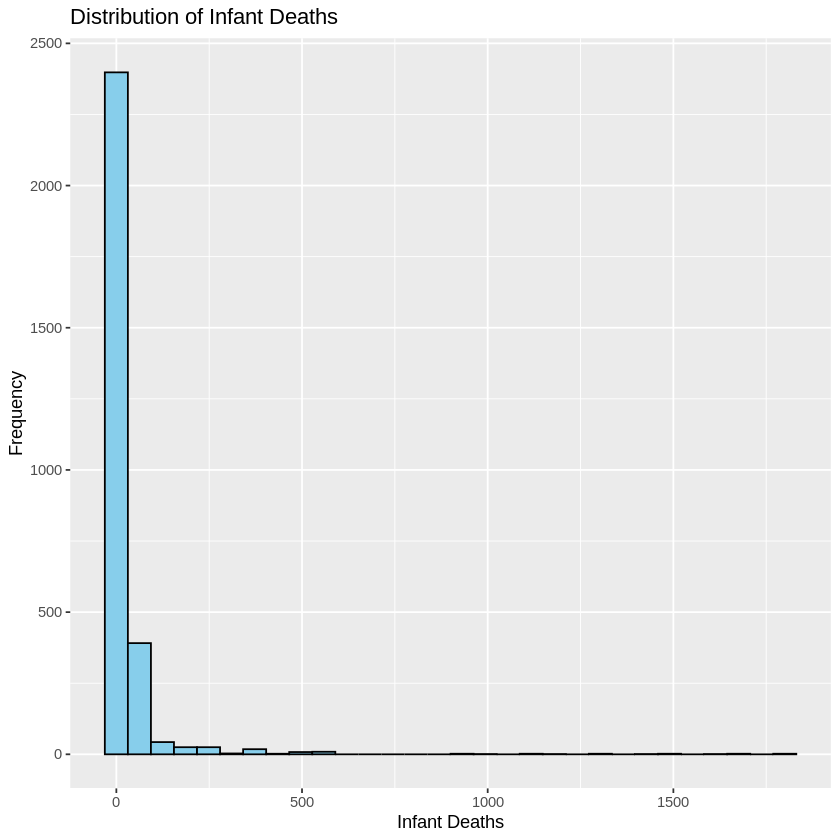

In [ ]:
ggplot(le, aes(x = `Infant Deaths`)) +
  geom_histogram(bins=30, fill = "skyblue", color = "black") +
  labs(title = "Distribution of Infant Deaths", x = "Infant Deaths", y = "Frequency")

In [ ]:
describe(na.omit(le$`Infant Deaths`))

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,2938,30.30395,117.9265,3,10.19898,4.4478,0,1800,1800,9.776972,115.7624,2.175632


Warning message:
“Removed 553 rows containing non-finite values (`stat_bin()`).”


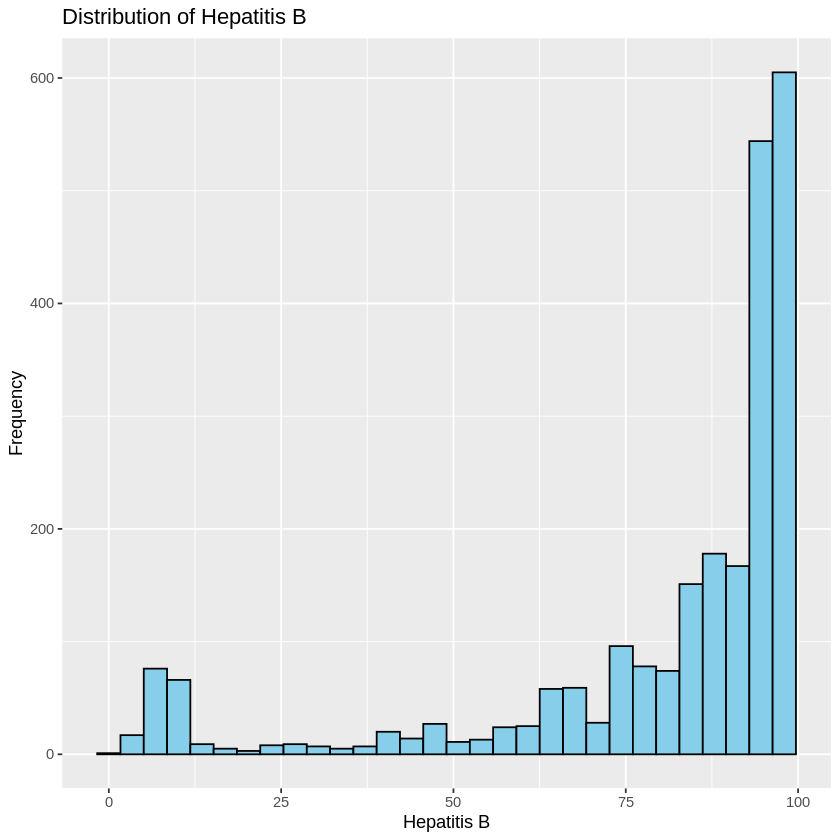

In [ ]:
ggplot(le, aes(x = `Hepatitis B`)) +
  geom_histogram(bins=30, fill = "skyblue", color = "black") +
  labs(title = "Distribution of Hepatitis B", x = "Hepatitis B", y = "Frequency")

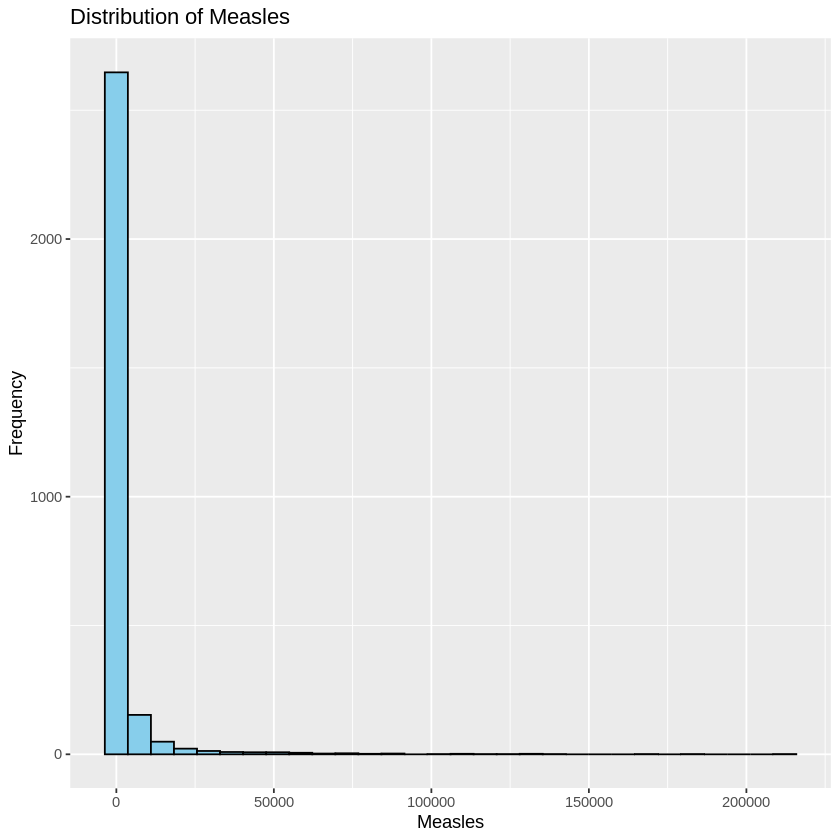

In [ ]:
ggplot(le, aes(x = Measles)) +
  geom_histogram(bins=30, fill = "skyblue", color = "black") +
  labs(title = "Distribution of Measles", x = "Measles", y = "Frequency")

Warning message:
“Removed 19 rows containing non-finite values (`stat_bin()`).”


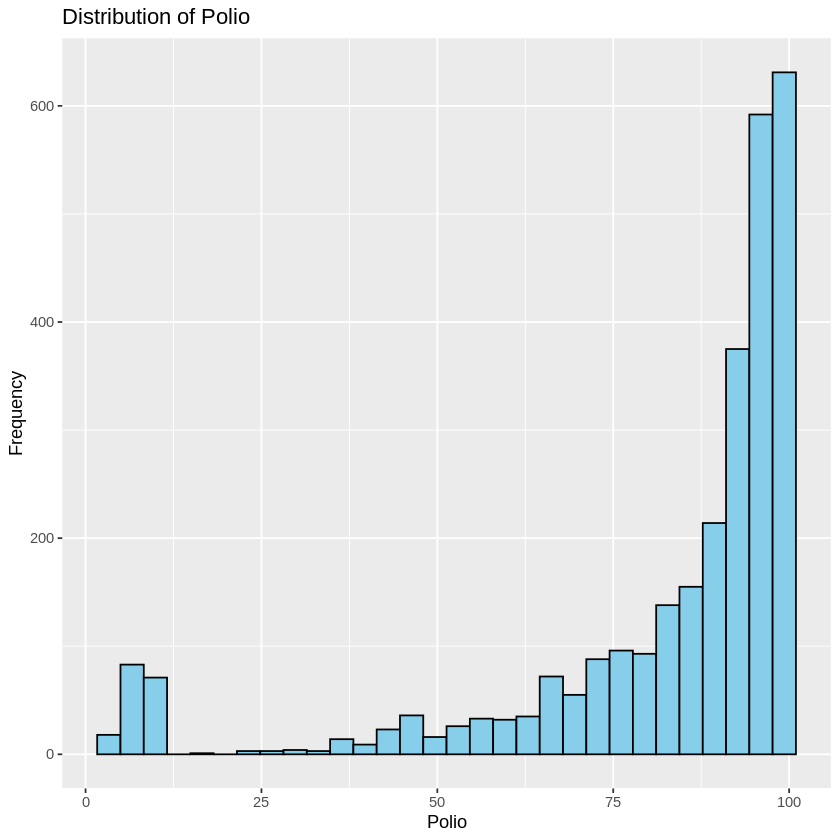

In [ ]:
ggplot(le, aes(x = Polio)) +
  geom_histogram(bins=30, fill = "skyblue", color = "black") +
  labs(title = "Distribution of Polio", x = "Polio", y = "Frequency")

In [ ]:
describe(na.omit(le$Polio))

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,2919,82.55019,23.42805,93,88.04964,8.8956,3,99,96,-2.095897,3.763353,0.4336297


Warning message:
“Removed 19 rows containing non-finite values (`stat_bin()`).”


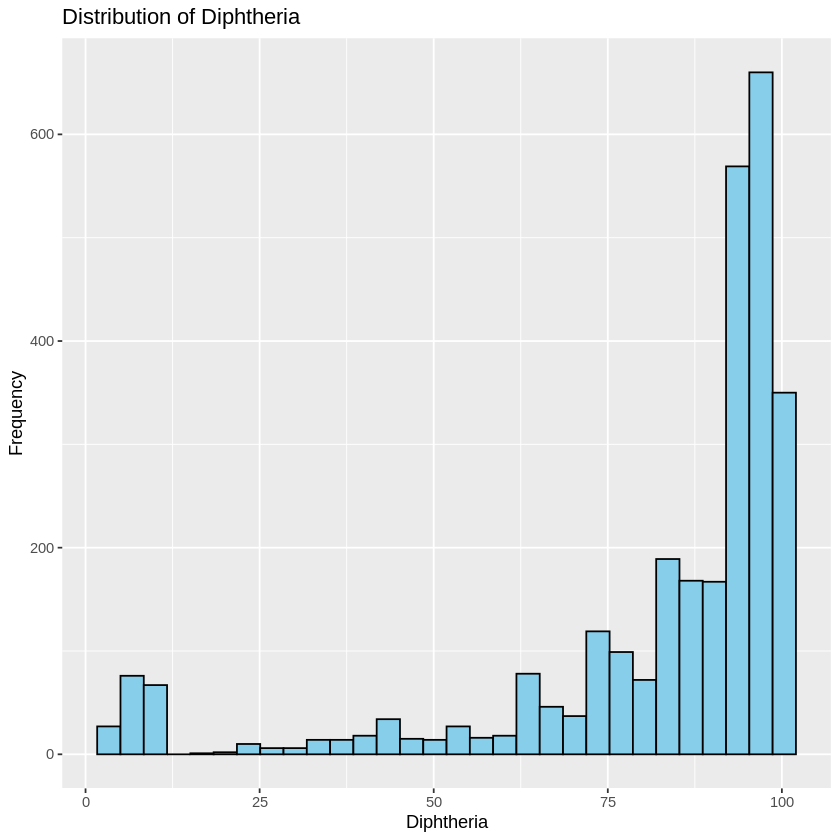

In [ ]:
ggplot(le, aes(x = Diphtheria)) +
  geom_histogram(bins=30, fill = "skyblue", color = "black") +
  labs(title = "Distribution of Diphtheria", x = "Diphtheria", y = "Frequency")

In [ ]:
describe(na.omit(le$Diphtheria))

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,2919,82.32408,23.71691,93,87.99016,8.8956,2,99,97,-2.070623,3.545509,0.4389763


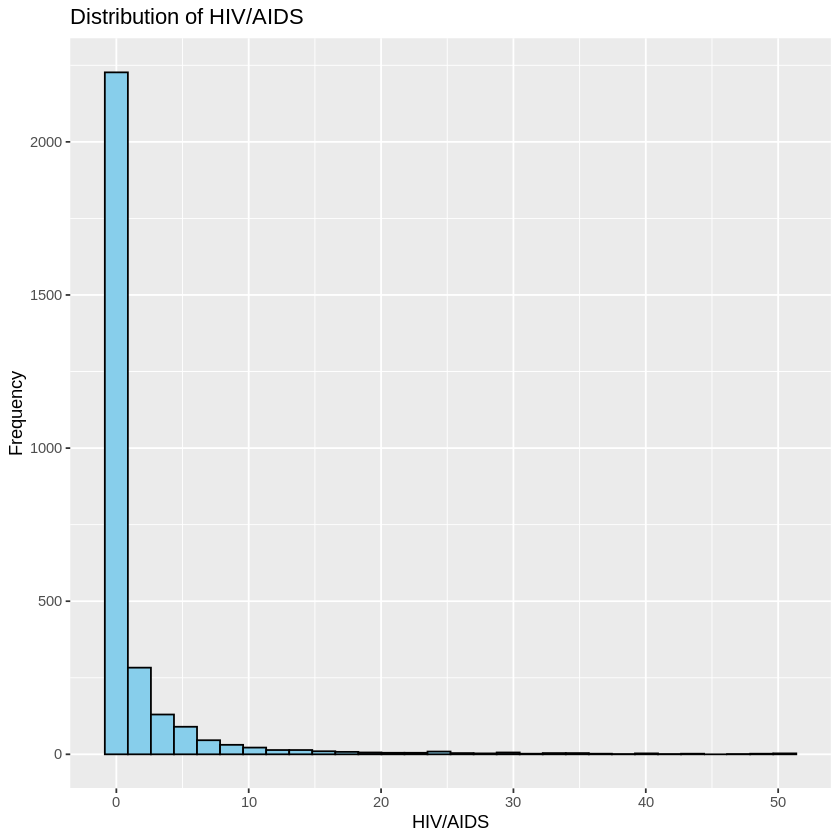

In [ ]:
ggplot(le, aes(x = `HIV/AIDS`)) +
  geom_histogram(bins=30, fill = "skyblue", color = "black") +
  labs(title = "Distribution of HIV/AIDS", x = "HIV/AIDS", y = "Frequency")

In [ ]:
describe(na.omit(le$`HIV/AIDS`))

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,2938,1.742103,5.077785,0.1,0.5372449,0,0.1,50.6,50.5,5.390603,34.80487,0.09368032


Warning message:
“Removed 34 rows containing non-finite values (`stat_bin()`).”


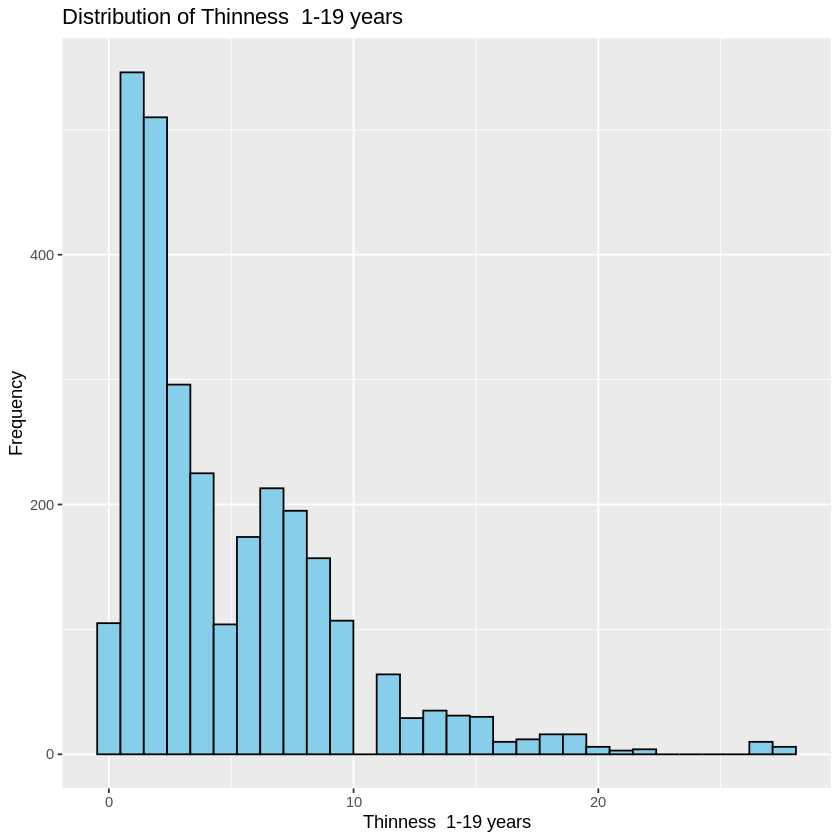

In [ ]:
ggplot(le, aes(x = ThinnessAyears)) +
  geom_histogram(bins=30, fill = "skyblue", color = "black") +
  labs(title = "Distribution of Thinness  1-19 years", x = "Thinness  1-19 years", y = "Frequency")

In [ ]:
describe(na.omit(le$ThinnessAyears))

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,2904,4.839704,4.420195,3.3,4.135972,3.40998,0.1,27.7,27.6,1.709703,3.956747,0.08202441


Warning message:
“Removed 34 rows containing non-finite values (`stat_bin()`).”


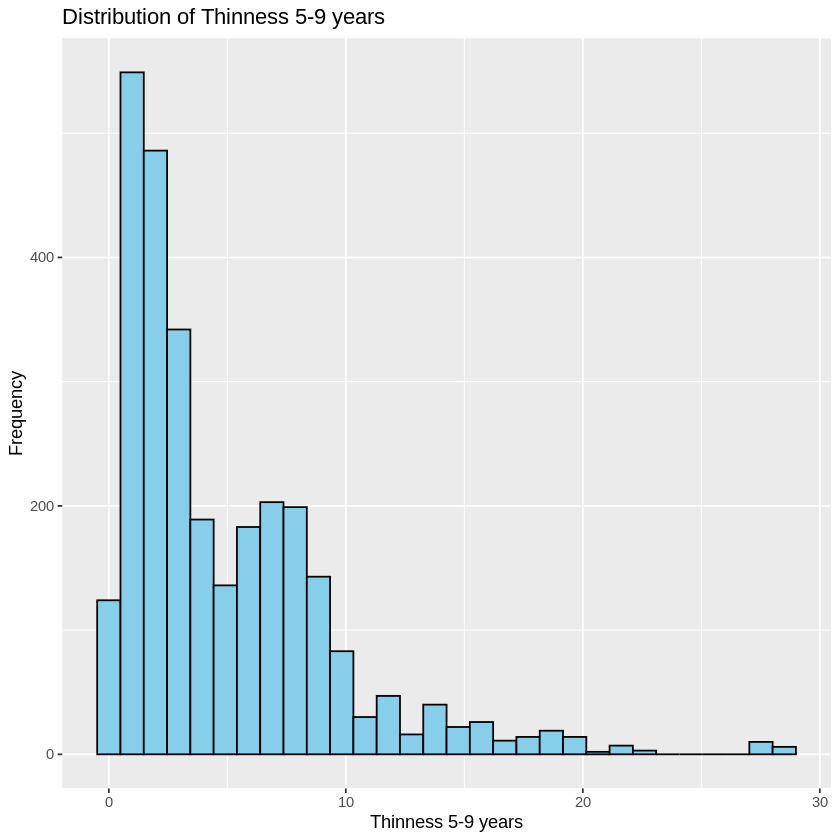

In [ ]:
ggplot(le, aes(x = ThinnessByears)) +
  geom_histogram(bins=30, fill = "skyblue", color = "black") +
  labs(title = "Distribution of Thinness 5-9 years", x = "Thinness 5-9 years", y = "Frequency")

In [ ]:
describe(na.omit(le$ThinnessByears))

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,2904,4.870317,4.508882,3.3,4.153098,3.40998,0.1,28.6,28.5,1.775588,4.344103,0.08367015


Warning message:
“Removed 10 rows containing non-finite values (`stat_bin()`).”


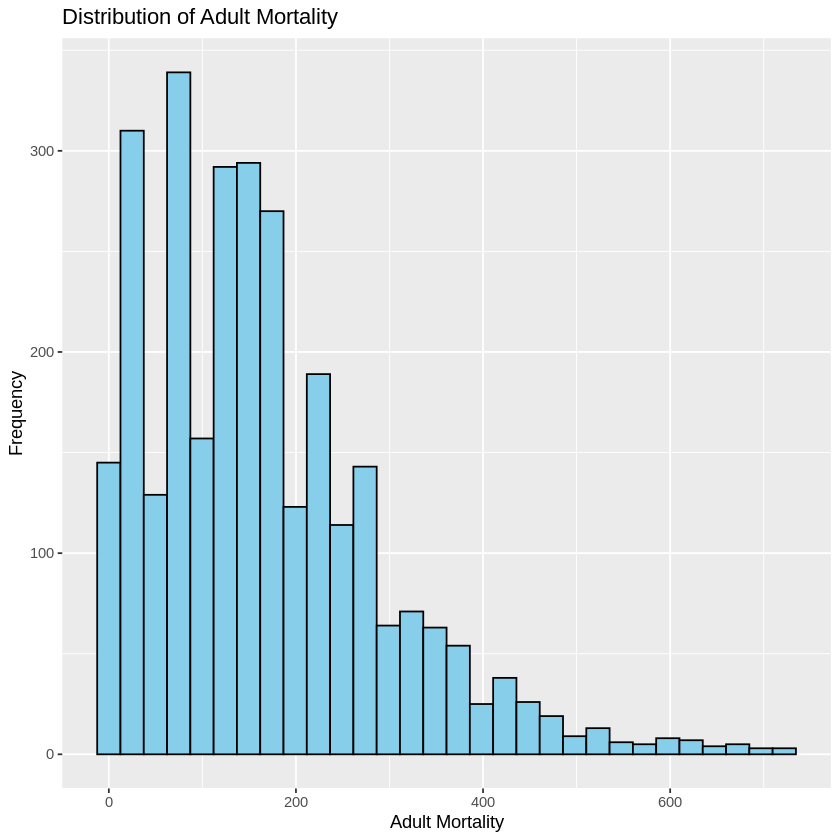

In [ ]:
ggplot(le, aes(x = `Adult Mortality`)) +
  geom_histogram(bins=30, fill = "skyblue", color = "black") +
  labs(title = "Distribution of Adult Mortality", x = "Adult Mortality", y = "Frequency")

In [ ]:
describe(na.omit(le$`Adult Mortality`))

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,2928,164.7964,124.2921,144,150.5064,112.6776,1,723,722,1.173167,1.740587,2.296984


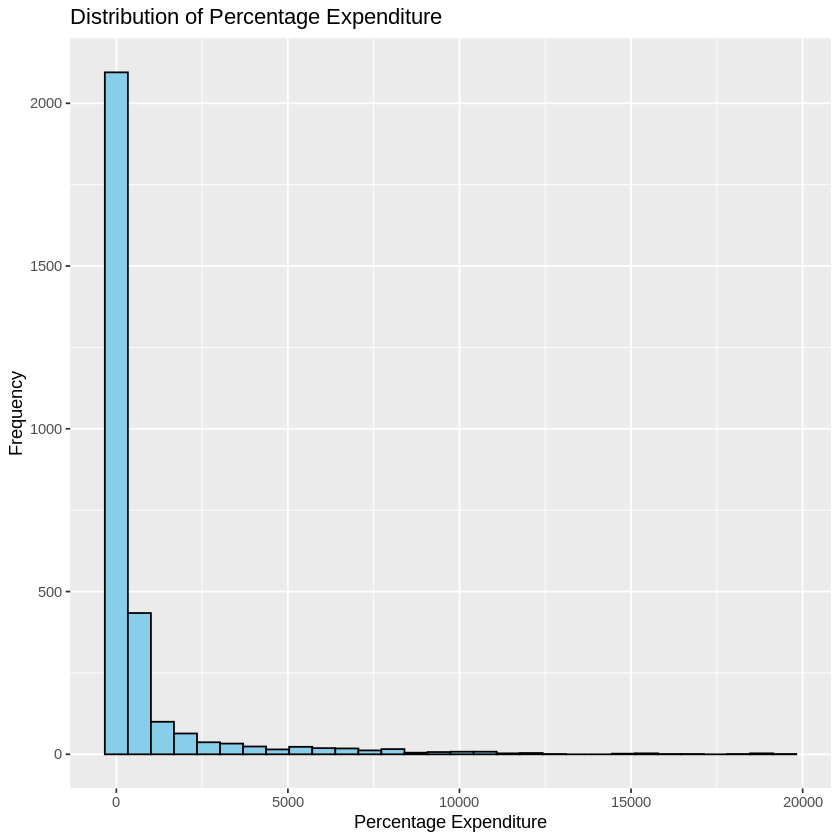

In [ ]:
ggplot(le, aes(x = `Percentage Expenditure`)) +
  geom_histogram(bins=30, fill = "skyblue", color = "black") +
  labs(title = "Distribution of Percentage Expenditure", x = "Percentage Expenditure", y = "Frequency")

In [ ]:
describe(na.omit(le$`Percentage Expenditure`))

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,2938,738.2513,1987.915,64.91291,230.7401,96.23987,0,19479.91,19479.91,4.647302,26.50605,36.67515


Warning message:
“Removed 34 rows containing non-finite values (`stat_bin()`).”


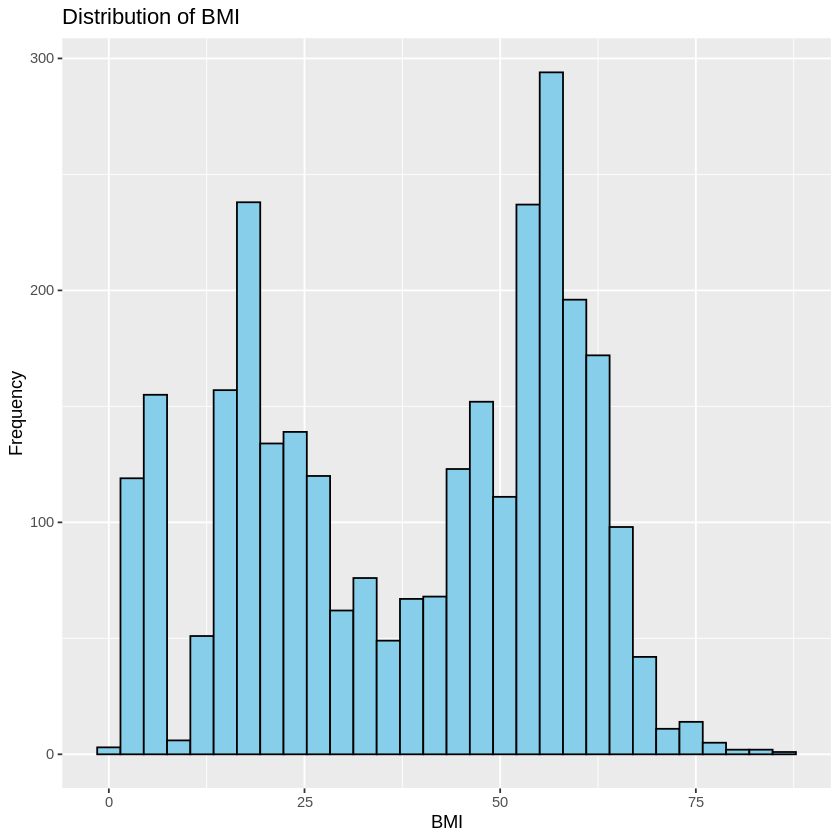

In [ ]:
ggplot(le, aes(x = `BMI`)) +
  geom_histogram(bins=30, fill = "skyblue", color = "black") +
  labs(title = "Distribution of BMI", x = "BMI", y = "Frequency")

In [ ]:
describe(na.omit(le$BMI))

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,2904,38.32125,20.04403,43.5,39.04927,24.16638,1,87.3,86.3,-0.2190851,-1.292116,0.3719519


Warning message:
“Removed 226 rows containing non-finite values (`stat_bin()`).”


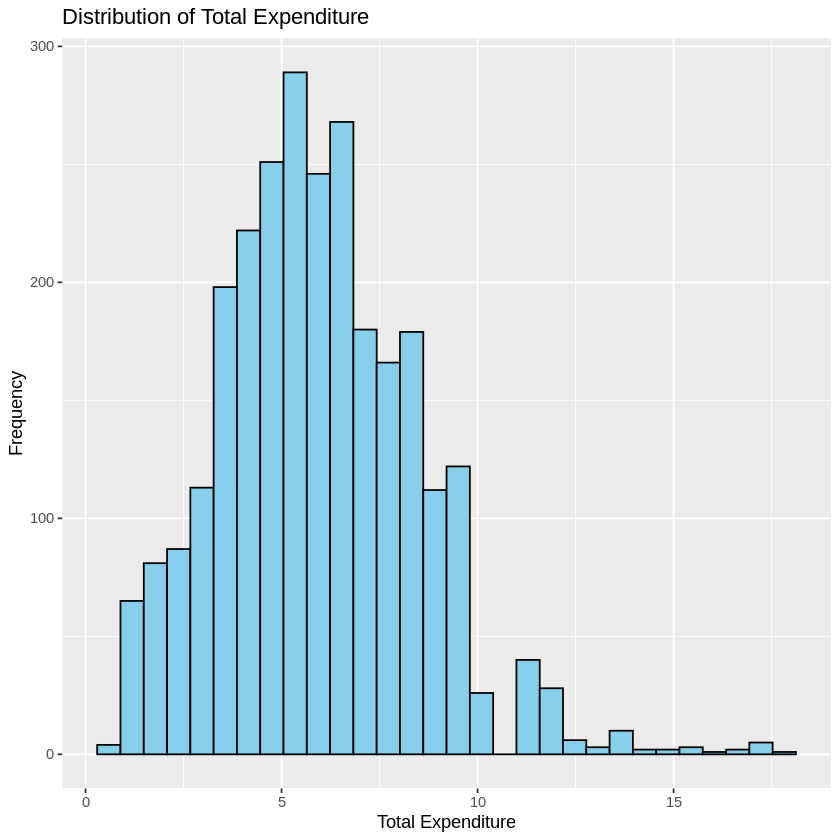

In [ ]:
ggplot(le, aes(x = `Total Expenditure`)) +
  geom_histogram(bins=30, fill = "skyblue", color = "black") +
  labs(title = "Distribution of Total Expenditure", x = "Total Expenditure", y = "Frequency")

In [ ]:
describe(na.omit(le$`Total Expenditure`))

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,2712,5.93819,2.49832,5.755,5.845816,2.357334,0.37,17.6,17.23,0.6180013,1.148867,0.04797369


Warning message:
“Removed 448 rows containing non-finite values (`stat_bin()`).”


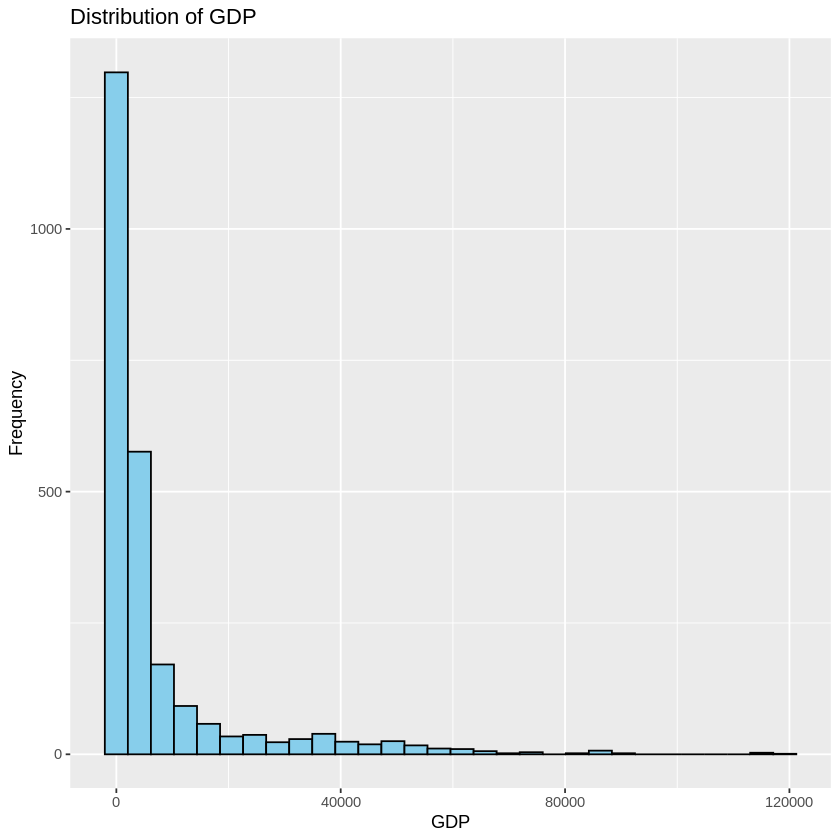

In [ ]:
ggplot(le, aes(x = `GDP`)) +
  geom_histogram(bins=30, fill = "skyblue", color = "black") +
  labs(title = "Distribution of GDP", x = "GDP", y = "Frequency")

In [ ]:
describe(na.omit(le$GDP))

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,2490,7483.158,14270.17,1766.948,3751.733,2360.975,1.68135,119172.7,119171.1,3.202792,12.29362,285.9759


Warning message:
“Removed 652 rows containing non-finite values (`stat_bin()`).”


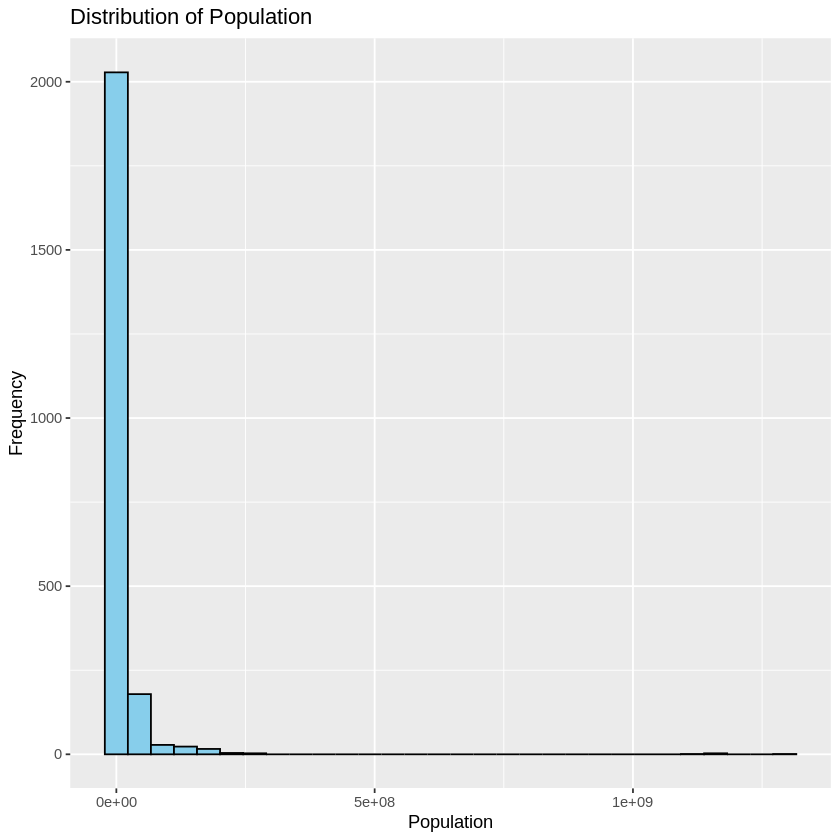

In [ ]:
ggplot(le, aes(x = `Population`)) +
  geom_histogram(bins=30, fill = "skyblue", color = "black") +
  labs(title = "Distribution of Population", x = "Population", y = "Frequency")

Warning message:
“Removed 167 rows containing non-finite values (`stat_bin()`).”


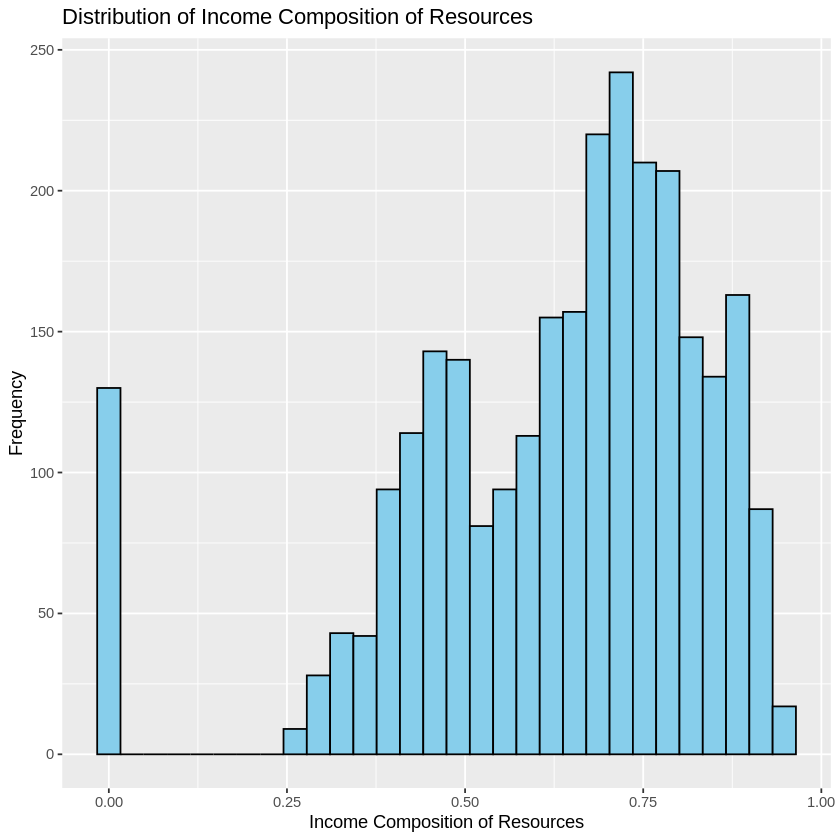

In [ ]:
ggplot(le, aes(x = `Income Composition of Resources`)) +
  geom_histogram(bins=30, fill = "skyblue", color = "black") +
  labs(title = "Distribution of Income Composition of Resources", x = "Income Composition of Resources", y = "Frequency")

In [ ]:
describe(na.omit(le$`Income Composition of Resources`))

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,2771,0.6275511,0.2109036,0.677,0.6502742,0.1882902,0,0.948,0.948,-1.142525,1.384971,0.004006505


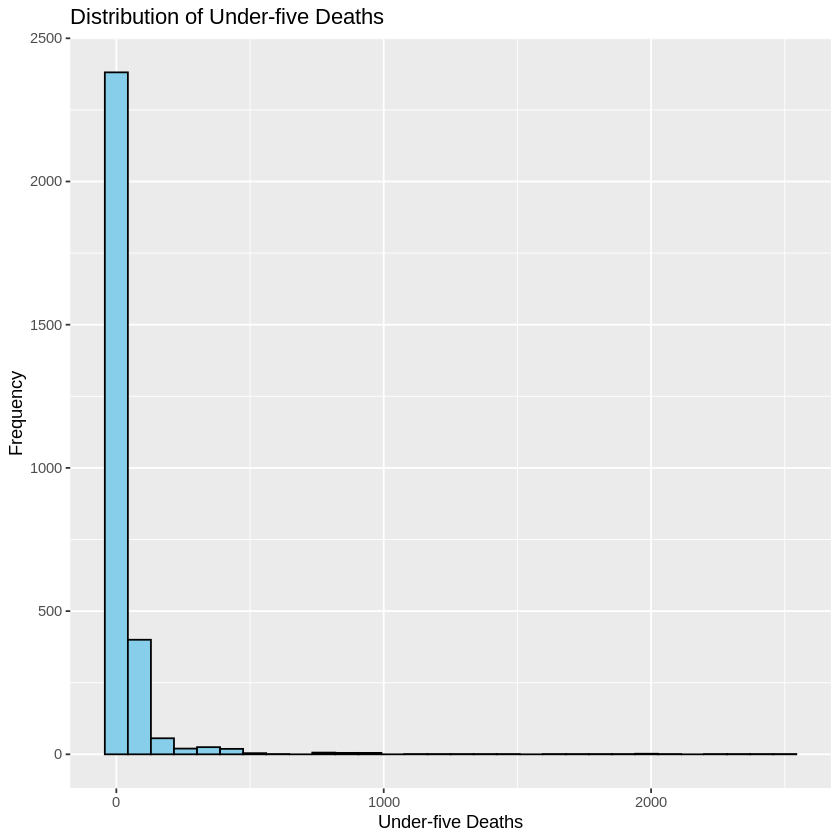

In [ ]:
ggplot(le, aes(x = `Under-five Deaths`)) +
  geom_histogram(bins=30, fill = "skyblue", color = "black") +
  labs(title = "Distribution of Under-five Deaths", x = "Under-five Deaths", y = "Frequency")

In [ ]:
describe(na.omit(le$`Under-five Deaths`))

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,2938,42.03574,160.4455,4,14.15094,5.9304,0,2500,2500,9.485371,109.4874,2.960069


Warning message:
“Removed 194 rows containing non-finite values (`stat_bin()`).”


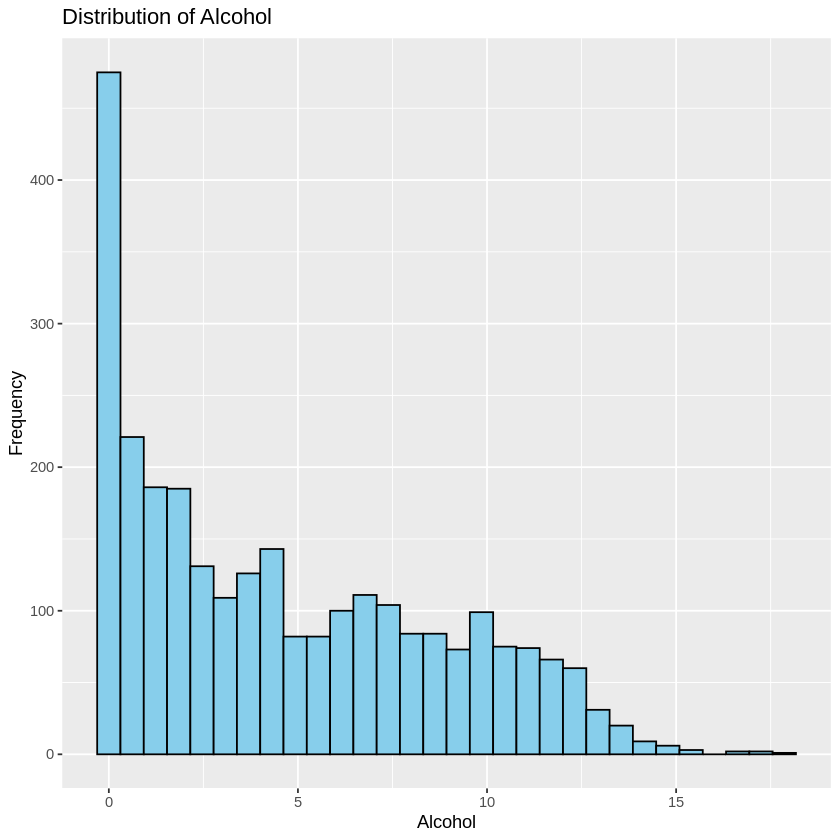

In [ ]:
ggplot(le, aes(x = `Alcohol`)) +
  geom_histogram(bins=30, fill = "skyblue", color = "black") +
  labs(title = "Distribution of Alcohol", x = "Alcohol", y = "Frequency")

## Statistical Hypothesis Testing

In [ ]:
describe(na.omit(le$`Life Expectancy`))

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,2928,69.22493,9.523867,72.1,69.91493,8.59908,36.3,89,52.7,-0.6379506,-0.2380132,0.1760061


Warning message:
“Removed 10 rows containing non-finite values (`stat_bin()`).”


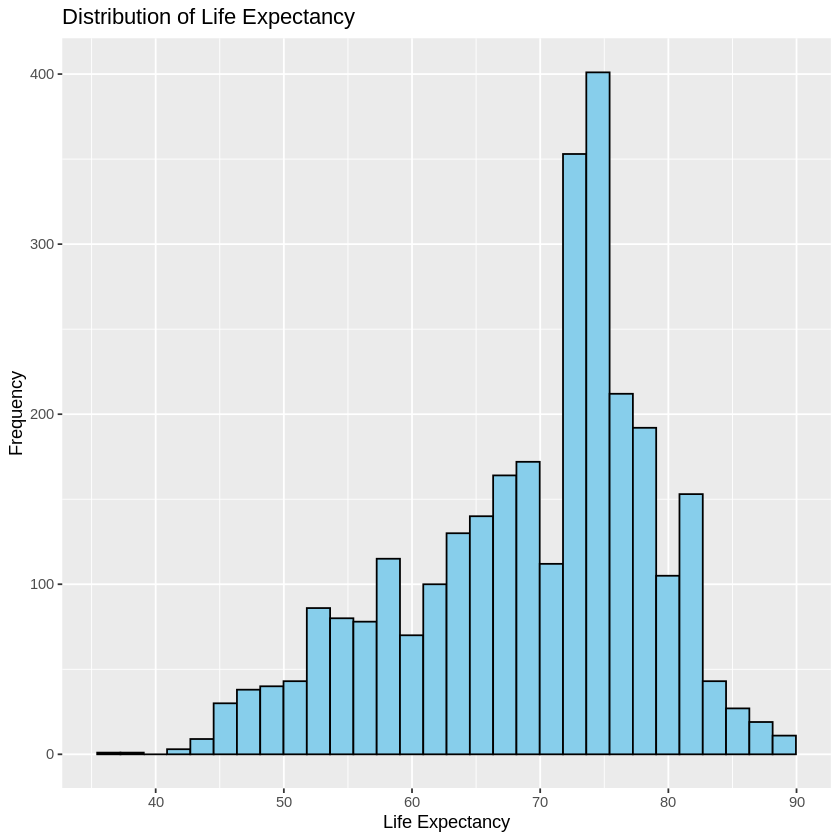

In [ ]:
ggplot(le, aes(x = `Life Expectancy`)) +
  geom_histogram(bins=30, fill = "skyblue", color = "black") +
  labs(title = "Distribution of Life Expectancy", x = "Life Expectancy", y = "Frequency")

Warning message:
“Removed 10 rows containing non-finite values (`stat_qq_line()`).”
Warning message:
“Removed 10 rows containing non-finite values (`stat_qq()`).”


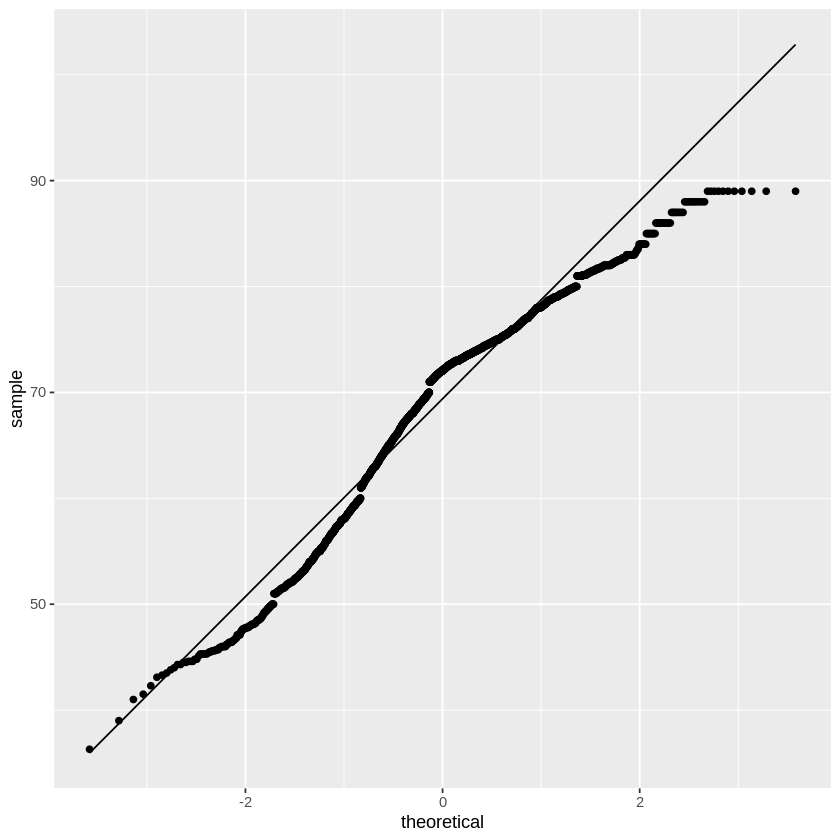

In [ ]:
ggplot(le, aes(sample=`Life Expectancy`)) +
  stat_qq_line() +
  stat_qq()

In [ ]:
t.test(na.omit(le$`Life Expectancy`), mu = 70)


	One Sample t-test

data:  na.omit(le$`Life Expectancy`)
t = -4.4036, df = 2927, p-value = 1.103e-05
alternative hypothesis: true mean is not equal to 70
95 percent confidence interval:
 68.87982 69.57004
sample estimates:
mean of x 
 69.22493 


In [ ]:
describeBy(le$`Life Expectancy`, le$Status)


 Descriptive statistics by group 
group: Developed
   vars   n mean   sd median trimmed  mad  min max range skew kurtosis   se
X1    1 512 79.2 3.93  79.25   79.15 3.63 69.9  89  19.1 0.09    -0.14 0.17
------------------------------------------------------------ 
group: Developing
   vars    n  mean   sd median trimmed  mad  min max range  skew kurtosis   se
X1    1 2416 67.11 9.01     69   67.81 8.45 36.3  89  52.7 -0.62    -0.37 0.18

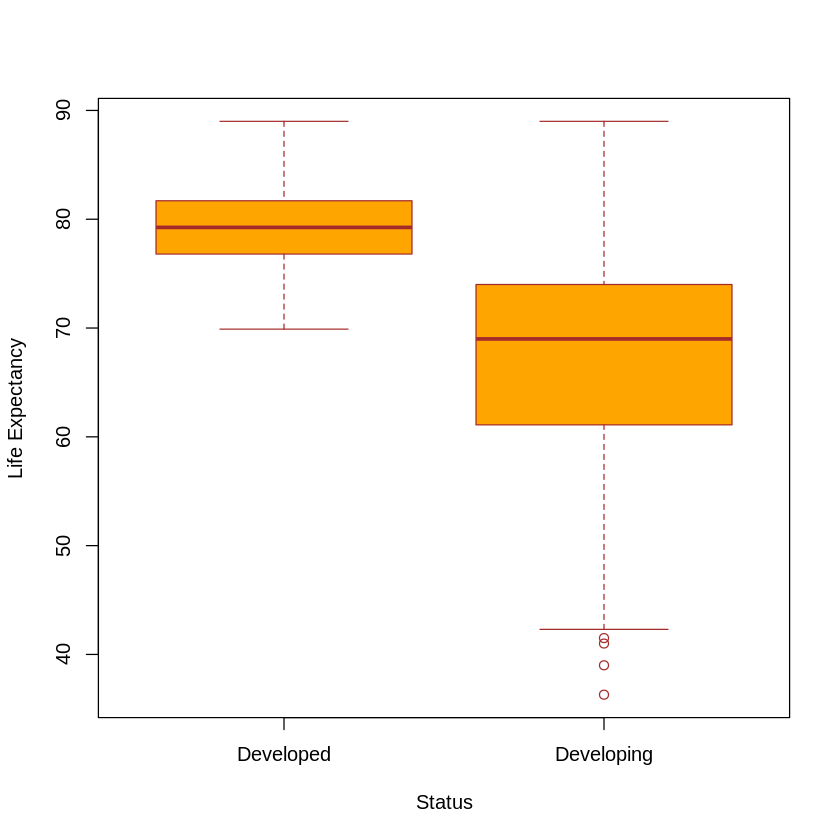

In [ ]:
boxplot(`Life Expectancy`~Status,
data=le,
main="",
xlab="Status",
ylab="Life Expectancy",
col="orange",
border="brown"
)

In [ ]:
leveneTest(`Life Expectancy` ~ Status,
            center=mean,
            data = le)

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,373.8147,1.776847e-78
,2926,NA,NA


In [ ]:
t.test(`Life Expectancy` ~ Status,
        data=le,
        var.equal=F)


	Welch Two Sample t-test

data:  Life Expectancy by Status
t = 47.868, df = 1807, p-value < 2.2e-16
alternative hypothesis: true difference in means between group Developed and group Developing is not equal to 0
95 percent confidence interval:
 11.59118 12.58159
sample estimates:
 mean in group Developed mean in group Developing 
                79.19785                 67.11147 


In [ ]:
levels(le$Status)

[1] "Developed"  "Developing"

In [ ]:
describeBy(le$`Life Expectancy`, le$Schooling)


 Descriptive statistics by group 
group: 1
   vars   n  mean  sd median trimmed  mad min  max range skew kurtosis   se
X1    1 321 57.29 6.7   57.4   57.22 6.97  39 74.6  35.6 0.13    -0.03 0.37
------------------------------------------------------------ 
group: 2
   vars   n  mean   sd median trimmed  mad  min max range  skew kurtosis   se
X1    1 953 64.13 8.04   65.5   64.73 9.04 36.3  79  42.7 -0.58    -0.32 0.26
------------------------------------------------------------ 
group: 3
   vars    n  mean   sd median trimmed mad  min max range  skew kurtosis   se
X1    1 1494 75.27 5.28   74.9   75.44 4.3 53.7  89  35.3 -0.47     1.59 0.14

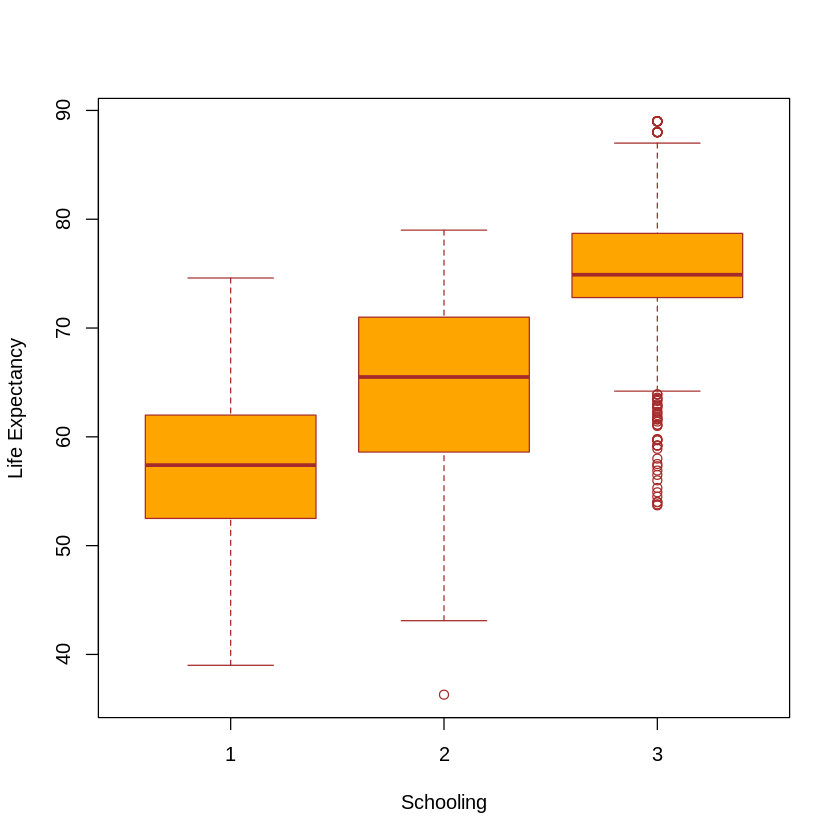

In [ ]:
boxplot(`Life Expectancy`~Schooling,
data=le,
main="",
xlab="Schooling",
ylab="Life Expectancy",
col="orange",
border="brown"
)

In [ ]:
ANOVA.results <- aov(`Life Expectancy` ~ Schooling, data=le)
summary(ANOVA.results)

              Df Sum Sq Mean Sq F value Pr(>F)    
Schooling      2 124977   62488    1471 <2e-16 ***
Residuals   2765 117479      42                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
170 observations deleted due to missingness

In [ ]:
leveneTest(`Life Expectancy` ~ Schooling,
            center=mean,
            data = le)

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,2,126.8449,1.969996e-53
,2765,NA,NA


In [ ]:
dunnett(ANOVA.results)


	 General Linear Hypotheses

Linear Hypotheses:
                 Estimate
(Intercept) == 0   57.287
Schooling2 == 0     6.847
Schooling3 == 0    17.982


## Correlation Analysis

Warning message:
“Removed 10 rows containing missing values (`geom_point()`).”



	Pearson's product-moment correlation

data:  le$`Adult Mortality` and le$`Life Expectancy`
t = -52.485, df = 2926, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.7145586 -0.6772181
sample estimates:
       cor 
-0.6963593 


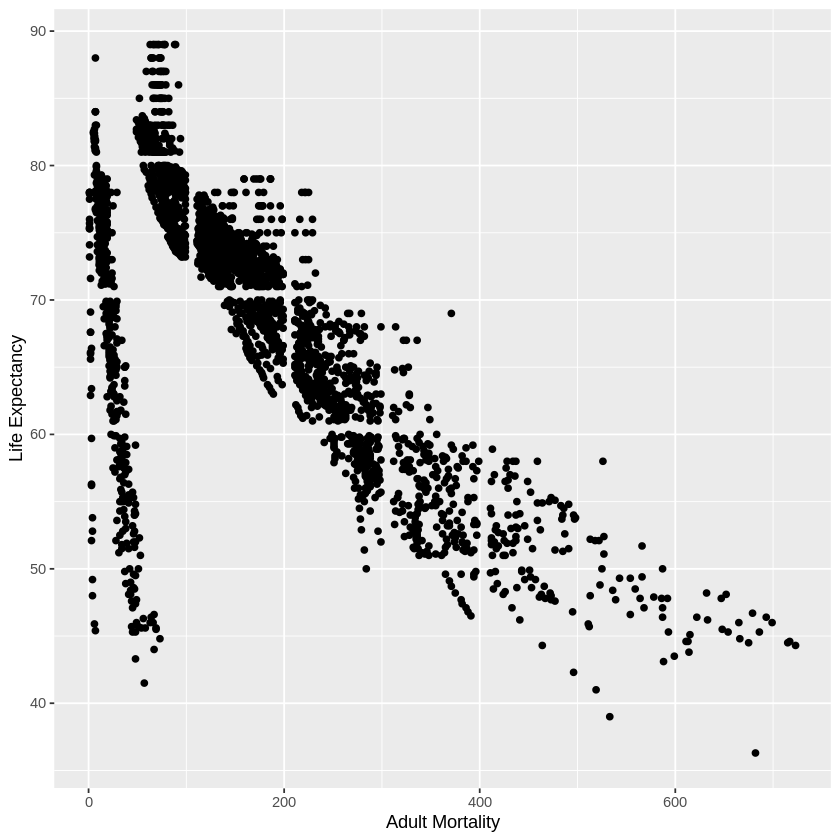

In [ ]:
ggplot(le, aes(x=`Adult Mortality`, y=`Life Expectancy`)) + geom_point() + labs(x="Adult Mortality", y="Life Expectancy")
cor.test(y=le$`Life Expectancy`, x=le$`Adult Mortality`, method = "pearson")

Warning message:
“Removed 10 rows containing missing values (`geom_point()`).”
Warning message in cor.test.default(y = le$`Life Expectancy`, x = le$`Infant Deaths`, :
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  le$`Infant Deaths` and le$`Life Expectancy`
S = 6.697e+09, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.6007275 


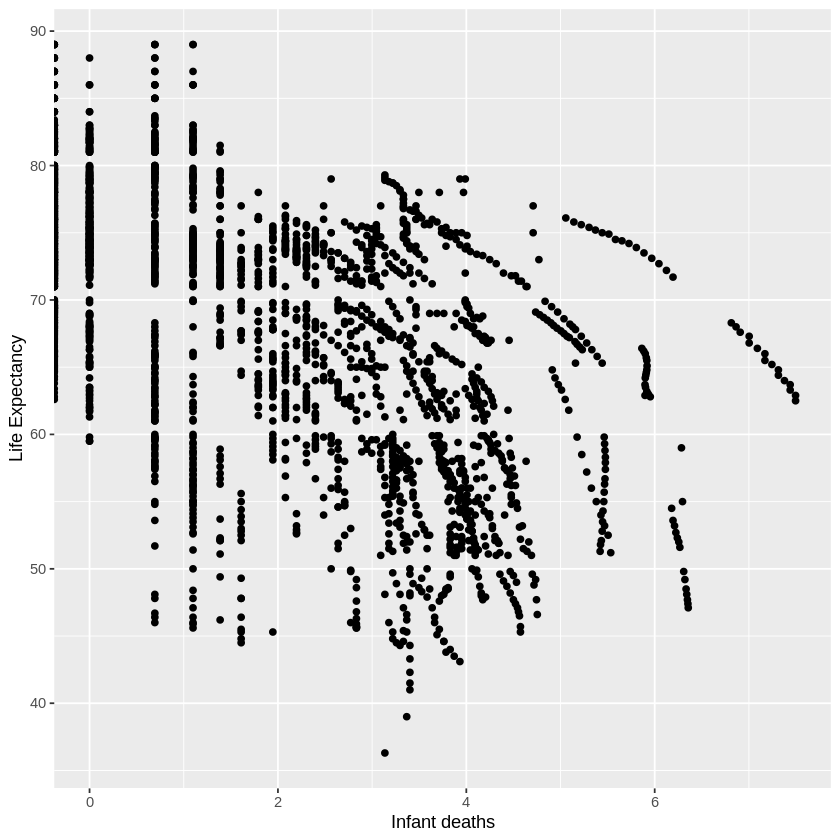

In [ ]:
ggplot(le, aes(x=log(`Infant Deaths`), y=`Life Expectancy`)) + geom_point() + labs(x="Infant deaths", y="Life Expectancy")
cor.test(y=le$`Life Expectancy`, x=le$`Infant Deaths`, method = "spearman")

Warning message:
“Removed 203 rows containing missing values (`geom_point()`).”


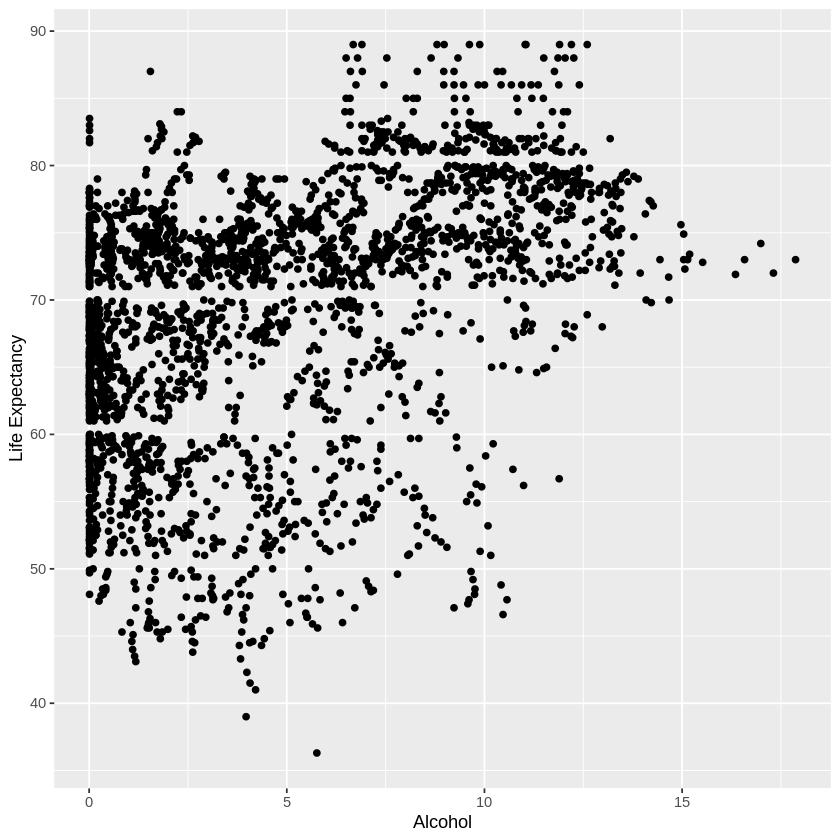

In [ ]:
ggplot(le, aes(x=`Alcohol`, y=`Life Expectancy`)) + geom_point() + labs(x="Alcohol", y="Life Expectancy")

Warning message:
“Removed 10 rows containing missing values (`geom_point()`).”
Warning message in cor.test.default(y = le$`Life Expectancy`, x = le$`Percentage Expenditure`, :
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  le$`Percentage Expenditure` and le$`Life Expectancy`
S = 2390780316, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.4285506 


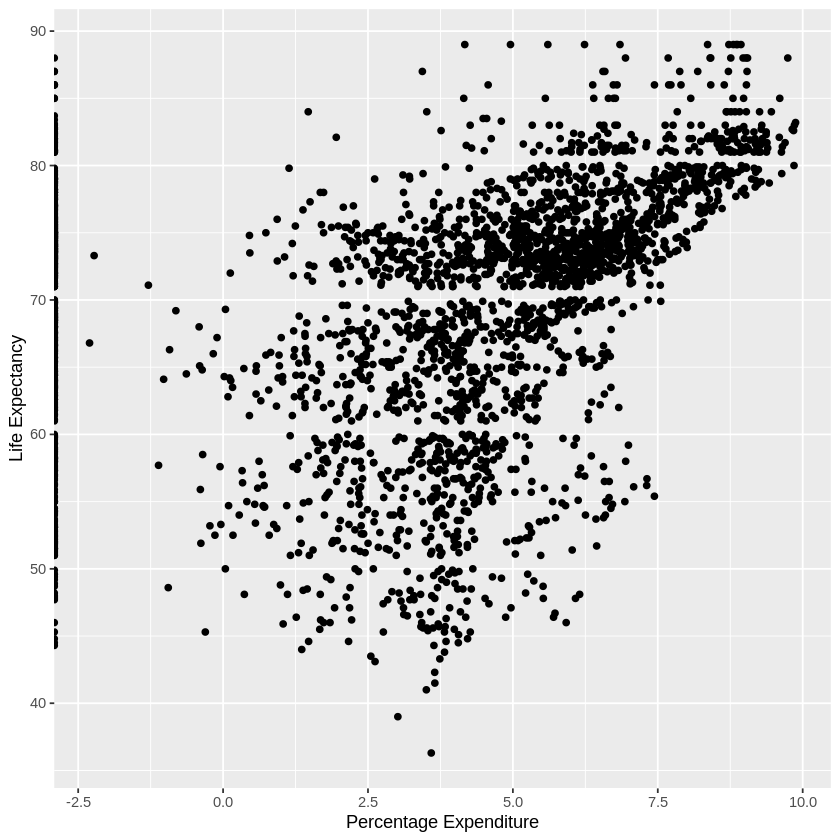

In [ ]:
ggplot(le, aes(x=log(`Percentage Expenditure`), y=`Life Expectancy`)) + geom_point() + labs(x="Percentage Expenditure", y="Life Expectancy")
cor.test(y=le$`Life Expectancy`, x=le$`Percentage Expenditure`, method = "spearman")

Warning message:
“Removed 563 rows containing missing values (`geom_point()`).”


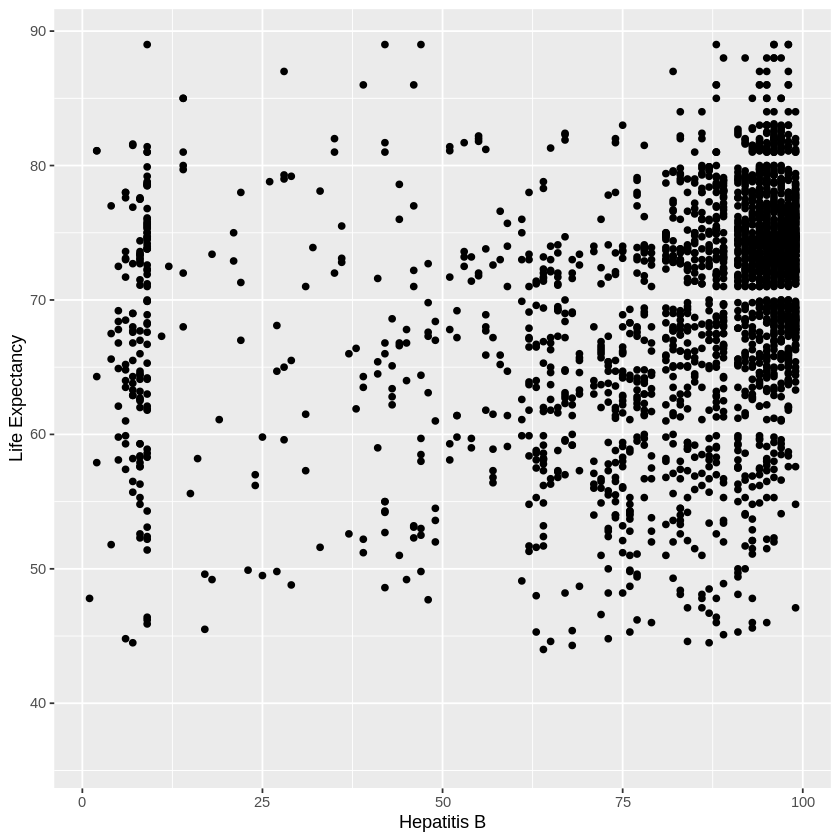

In [ ]:
ggplot(le, aes(x=`Hepatitis B`, y=`Life Expectancy`)) + geom_point() + labs(x="Hepatitis B", y="Life Expectancy")

Warning message:
“Removed 10 rows containing missing values (`geom_point()`).”


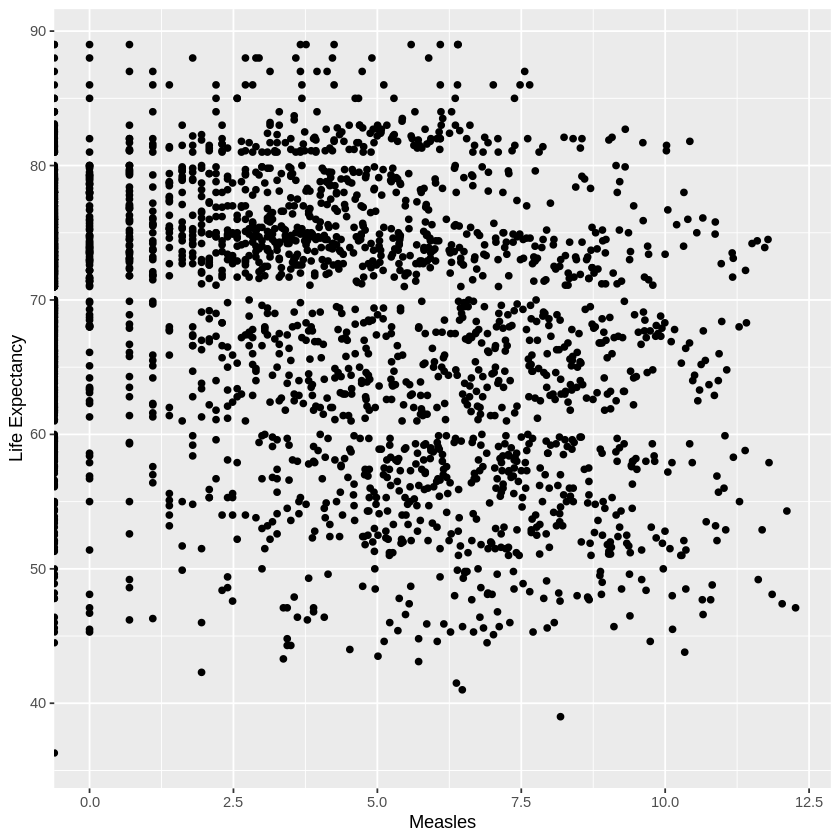

In [ ]:
ggplot(le, aes(x=log(Measles), y=`Life Expectancy`)) + geom_point() + labs(x="Measles", y="Life Expectancy")

Warning message:
“Removed 42 rows containing missing values (`geom_point()`).”



	Pearson's product-moment correlation

data:  le$BMI and le$`Life Expectancy`
t = 37.097, df = 2894, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.5424873 0.5918785
sample estimates:
      cor 
0.5676935 


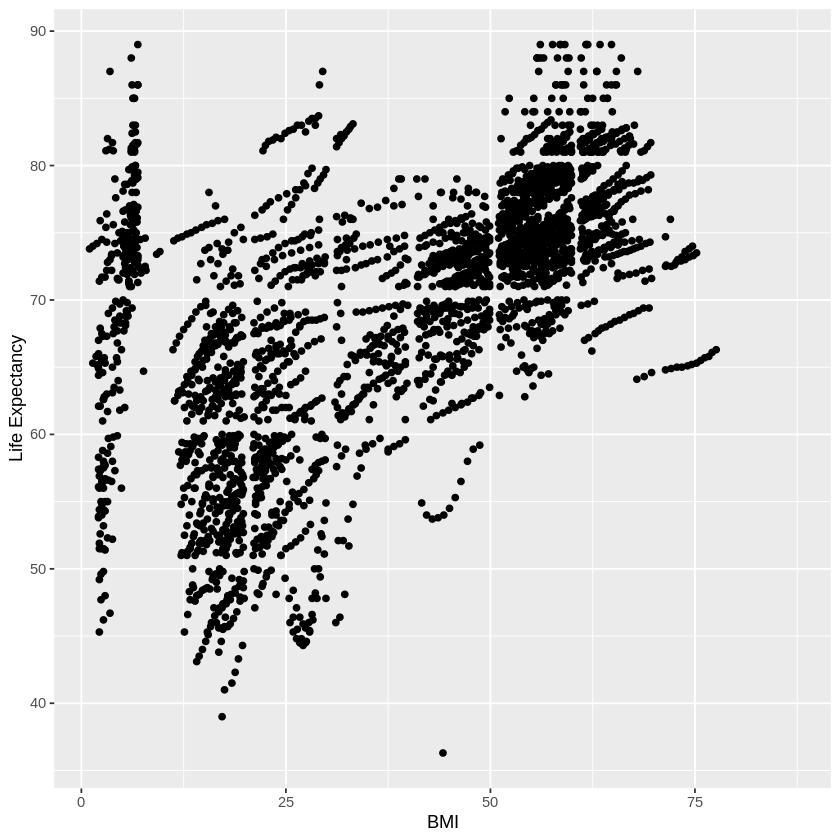

In [ ]:
ggplot(le, aes(x=BMI, y=`Life Expectancy`)) + geom_point() + labs(x="BMI", y="Life Expectancy")
cor.test(y=le$`Life Expectancy`, x=le$BMI, method = "pearson")

Warning message:
“Removed 10 rows containing missing values (`geom_point()`).”
Warning message in cor.test.default(y = le$`Life Expectancy`, x = le$`Under-five Deaths`, :
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  le$`Under-five Deaths` and le$`Life Expectancy`
S = 6771803864, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.6186109 


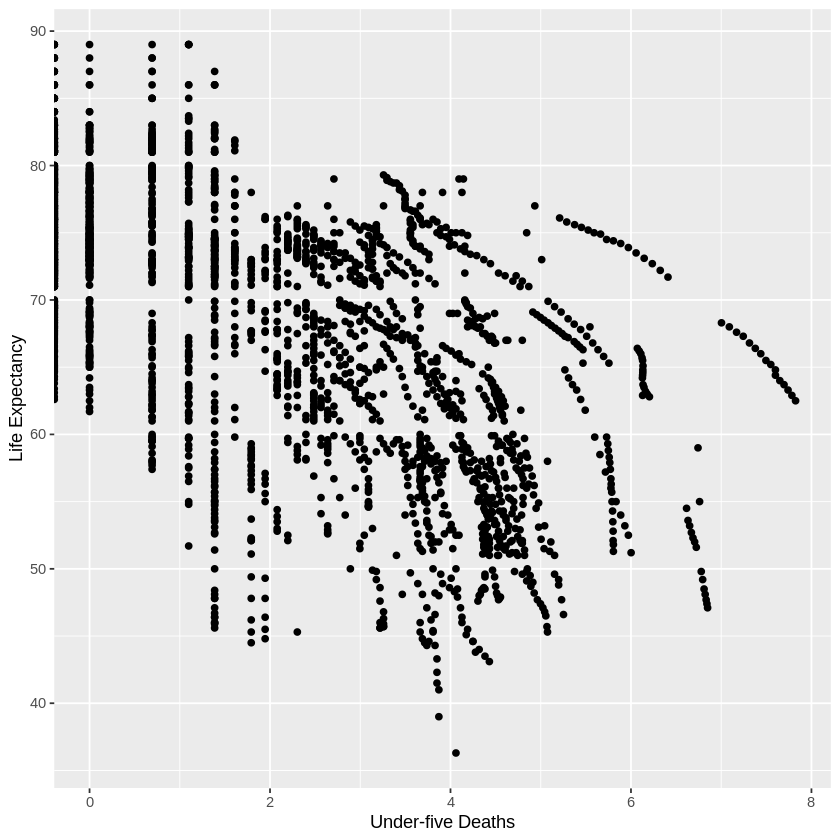

In [ ]:
ggplot(le, aes(x=log(`Under-five Deaths`), y=`Life Expectancy`)) + geom_point() + labs(x="Under-five Deaths", y="Life Expectancy")
cor.test(y=le$`Life Expectancy`, x=le$`Under-five Deaths`, method = "spearman")

Warning message:
“Removed 29 rows containing missing values (`geom_point()`).”
Warning message in cor.test.default(y = le$`Life Expectancy`, x = le$Polio, method = "spearman"):
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  le$Polio and le$`Life Expectancy`
S = 1908064090, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.5349356 


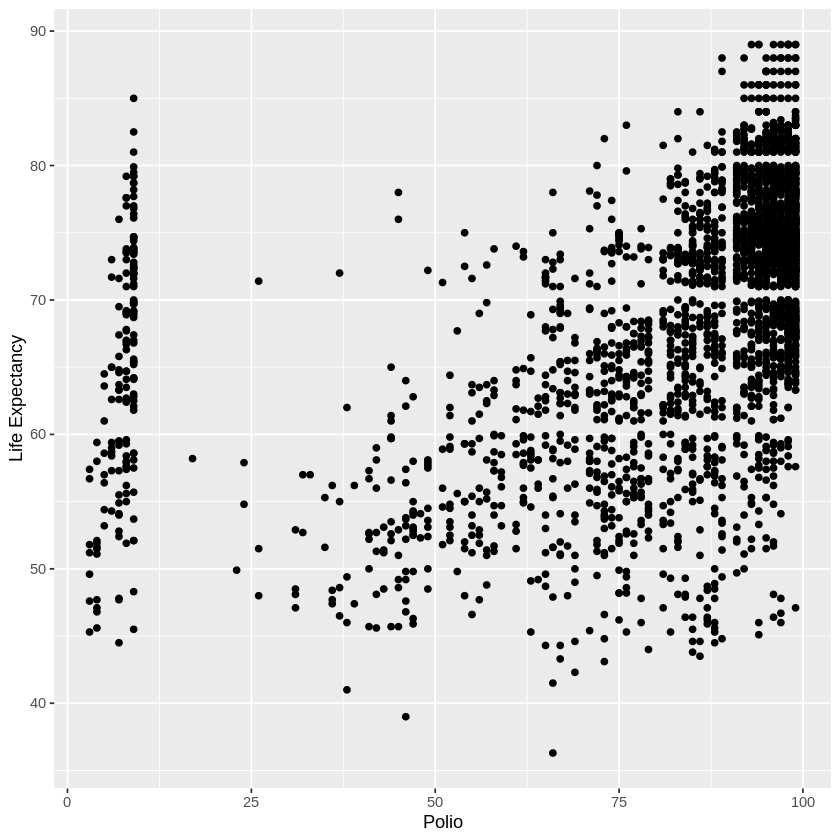

In [ ]:
ggplot(le, aes(x=Polio, y=`Life Expectancy`)) + geom_point() + labs(x="Polio", y="Life Expectancy")
cor.test(y=le$`Life Expectancy`, x=le$Polio, method = "spearman")

Warning message:
“Removed 236 rows containing missing values (`geom_point()`).”


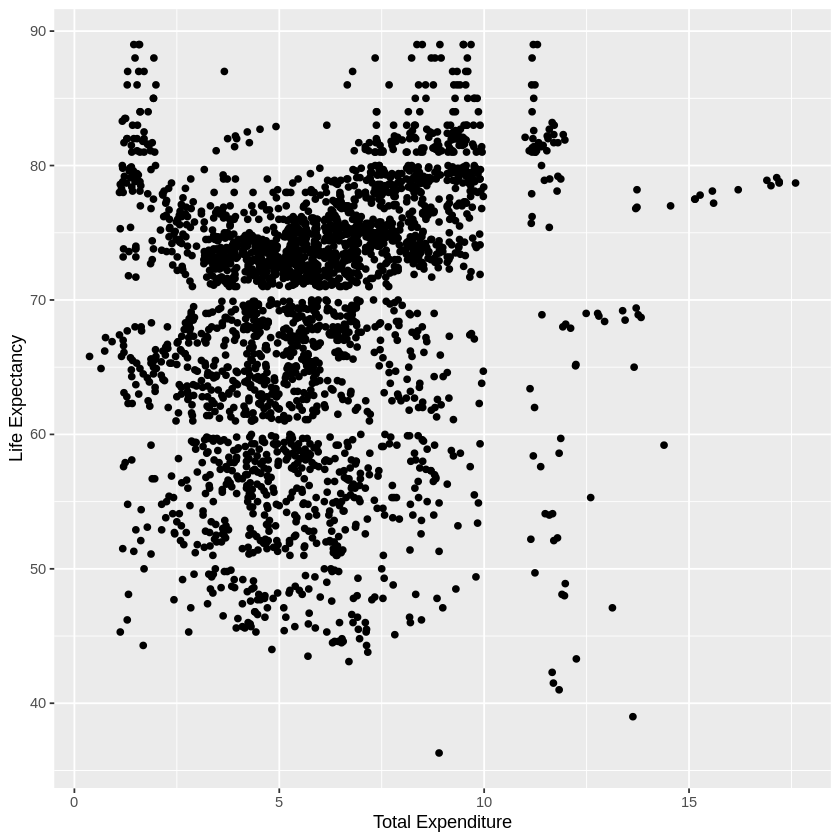

In [ ]:
ggplot(le, aes(x=`Total Expenditure`, y=`Life Expectancy`)) + geom_point() + labs(x="Total Expenditure", y="Life Expectancy")

Warning message:
“Removed 29 rows containing missing values (`geom_point()`).”
Warning message in cor.test.default(y = le$`Life Expectancy`, x = le$Diphtheria, :
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  le$Diphtheria and le$`Life Expectancy`
S = 1868431842, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.5445954 


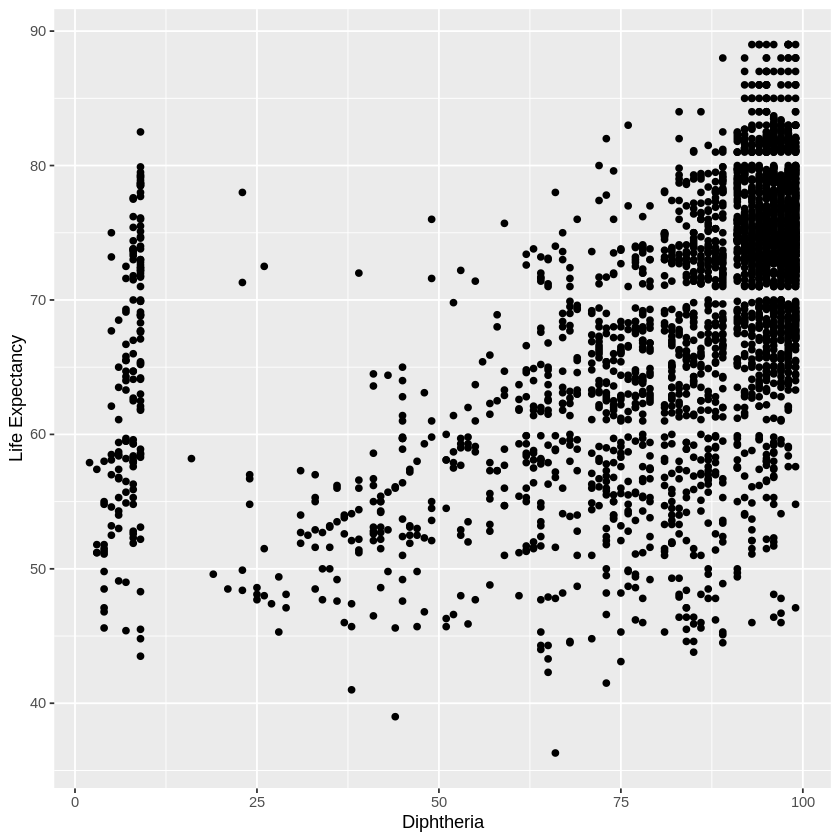

In [ ]:
ggplot(le, aes(x=Diphtheria, y=`Life Expectancy`)) + geom_point() + labs(x="Diphtheria", y="Life Expectancy")
cor.test(y=le$`Life Expectancy`, x=le$Diphtheria, method = "spearman")

Warning message:
“Removed 10 rows containing missing values (`geom_point()`).”
Warning message in cor.test.default(y = le$`Life Expectancy`, x = le$`HIV/AIDS`, :
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  le$`HIV/AIDS` and le$`Life Expectancy`
S = 7336734864, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.7536419 


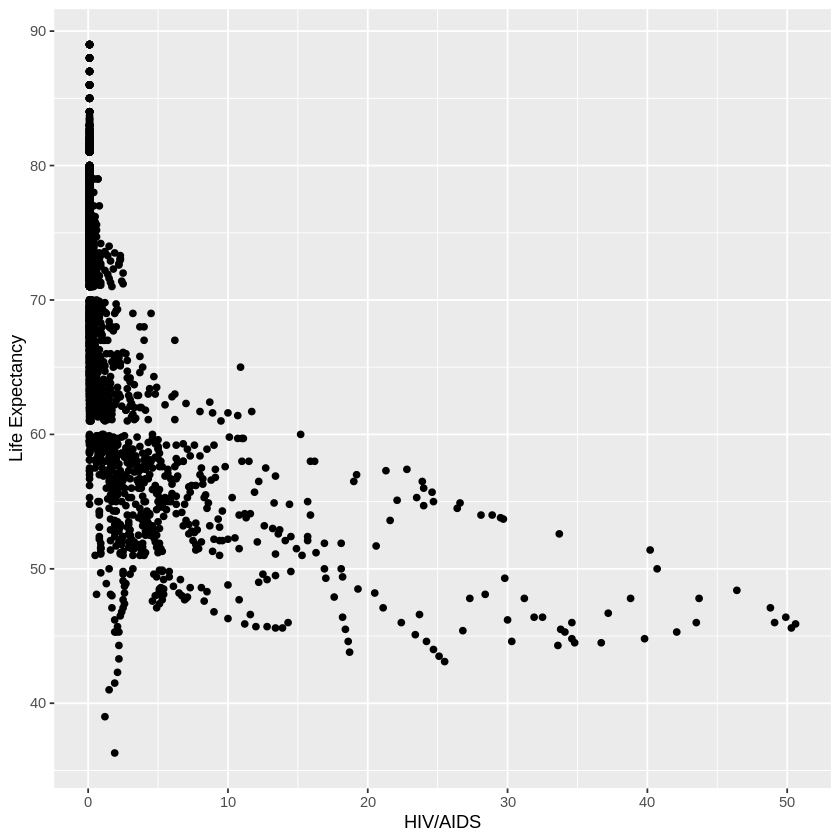

In [ ]:
ggplot(le, aes(x=`HIV/AIDS`, y=`Life Expectancy`)) + geom_point() + labs(x="HIV/AIDS", y="Life Expectancy")
cor.test(y=le$`Life Expectancy`, x=le$`HIV/AIDS`, method = "spearman")

Warning message:
“Removed 453 rows containing missing values (`geom_point()`).”
Warning message in cor.test.default(y = le$`Life Expectancy`, x = le$GDP, method = "spearman"):
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  le$GDP and le$`Life Expectancy`
S = 914406297, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.6424709 


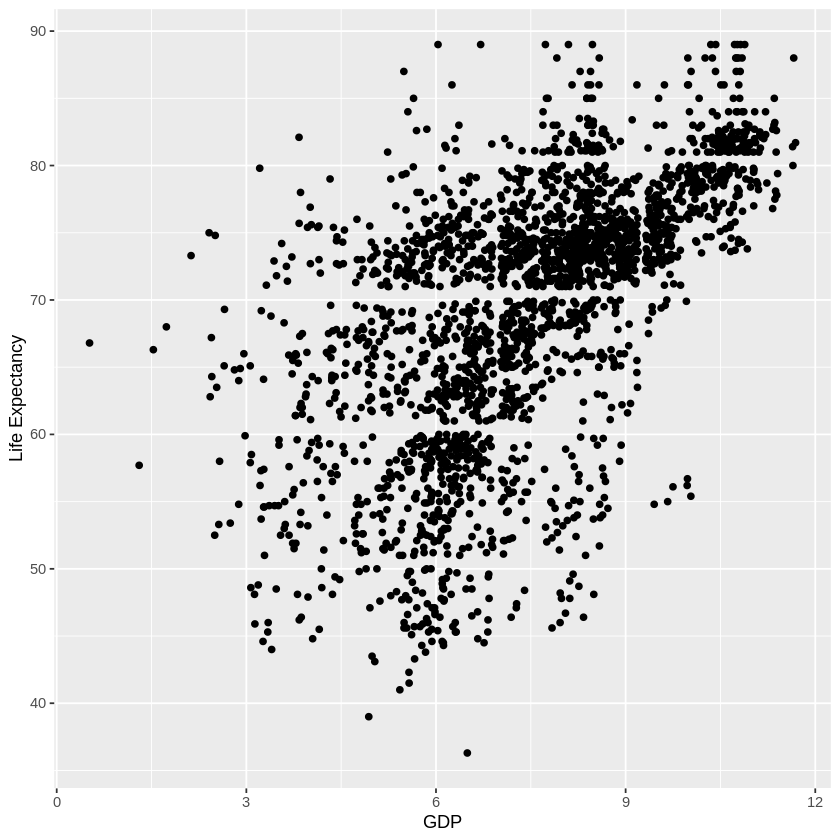

In [ ]:
ggplot(le, aes(x=log(GDP), y=`Life Expectancy`)) + geom_point() + labs(x="GDP", y="Life Expectancy")
cor.test(y=le$`Life Expectancy`, x=le$GDP, method = "spearman")

Warning message:
“Removed 654 rows containing missing values (`geom_point()`).”


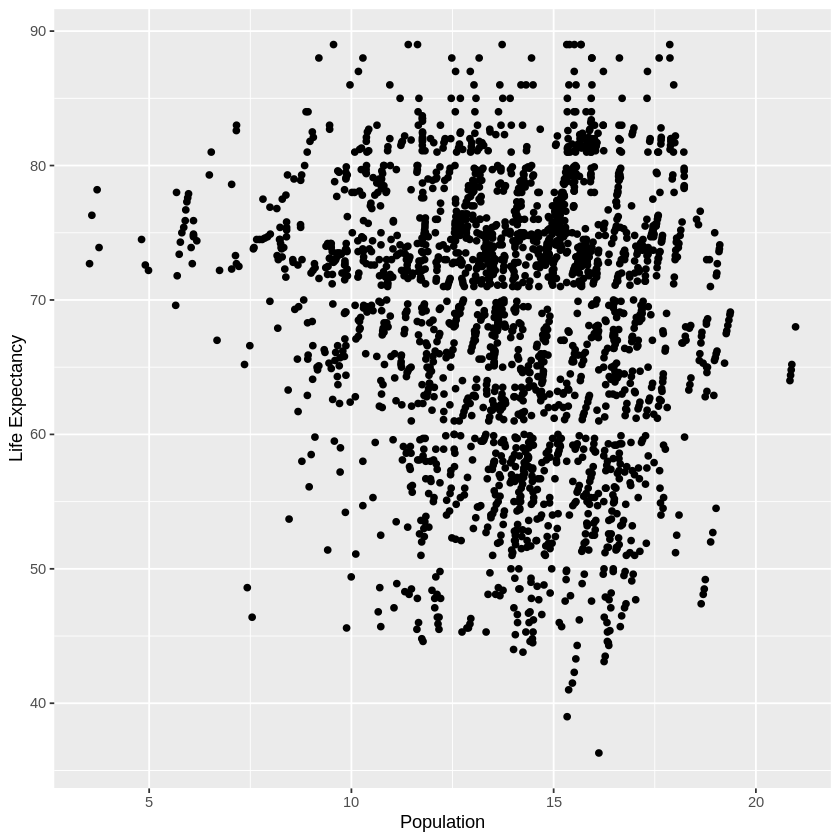

In [ ]:
ggplot(le, aes(x=log(Population), y=`Life Expectancy`)) + geom_point() + labs(x="Population", y="Life Expectancy")

Warning message:
“Removed 42 rows containing missing values (`geom_point()`).”
Warning message in cor.test.default(y = le$`Life Expectancy`, x = le$ThinnessAyears, :
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  le$ThinnessAyears and le$`Life Expectancy`
S = 6521238852, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.6109636 


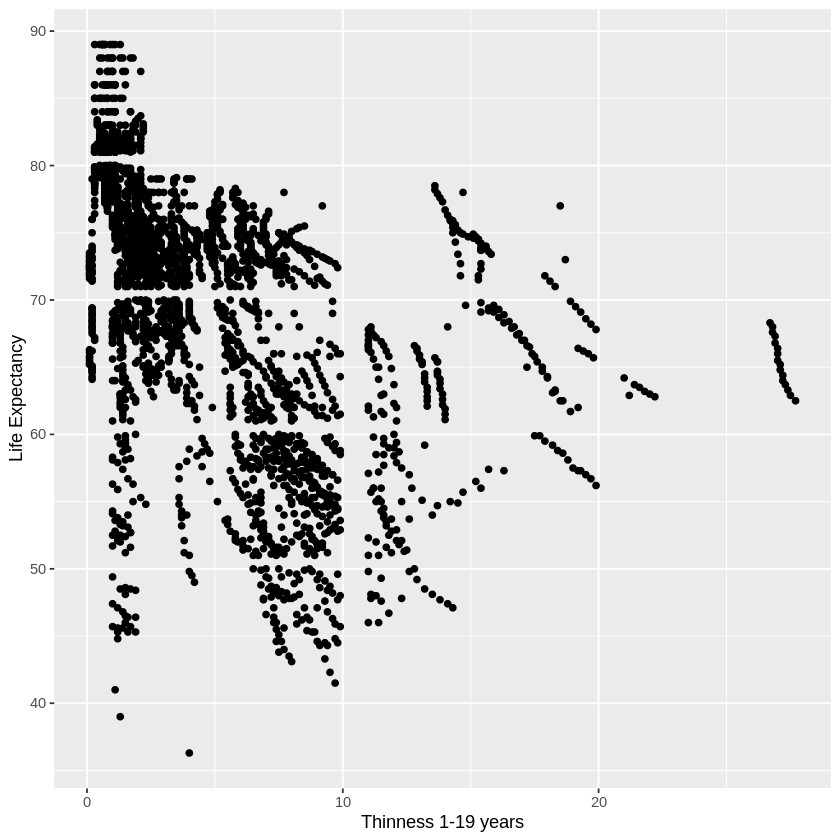

In [ ]:
ggplot(le, aes(x=ThinnessAyears, y=`Life Expectancy`)) + geom_point() + labs(x="Thinness 1-19 years", y="Life Expectancy")
cor.test(y=le$`Life Expectancy`, x=le$ThinnessAyears, method = "spearman")

Warning message:
“Removed 42 rows containing missing values (`geom_point()`).”
Warning message in cor.test.default(y = le$`Life Expectancy`, x = le$ThinnessByears, :
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  le$ThinnessByears and le$`Life Expectancy`
S = 6562591622, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.6211791 


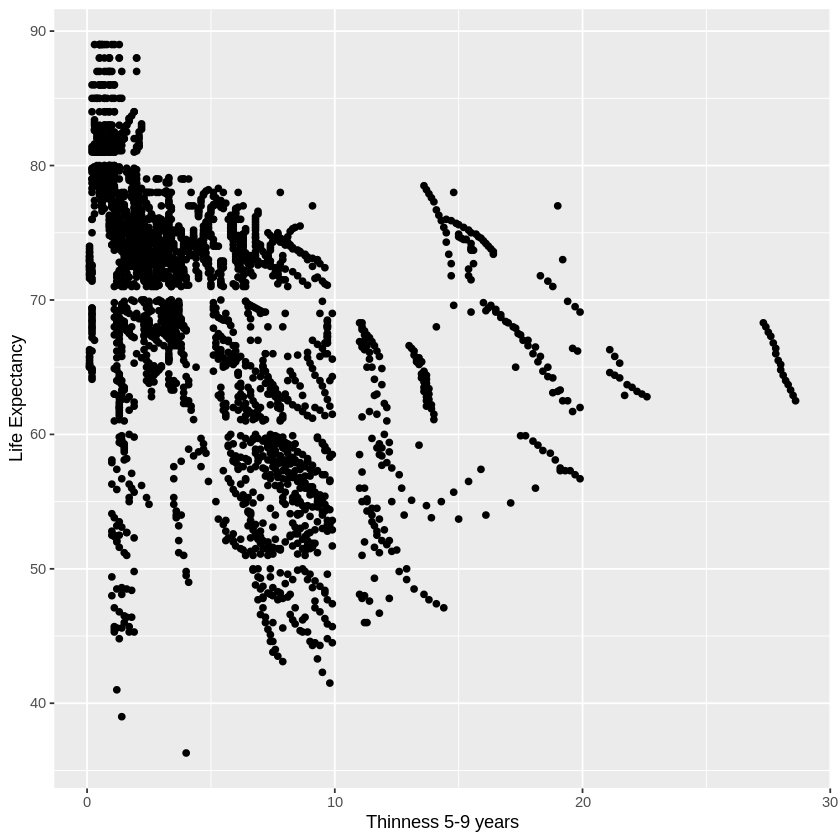

In [ ]:
ggplot(le, aes(x=ThinnessByears, y=`Life Expectancy`)) + geom_point() + labs(x="Thinness 5-9 years", y="Life Expectancy")
cor.test(y=le$`Life Expectancy`, x=le$ThinnessByears, method = "spearman")

Warning message:
“Removed 170 rows containing missing values (`geom_point()`).”



	Pearson's product-moment correlation

data:  le$`Income Composition of Resources` and le$`Life Expectancy`
t = 55.325, df = 2766, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.7065996 0.7419965
sample estimates:
     cor 
0.724776 


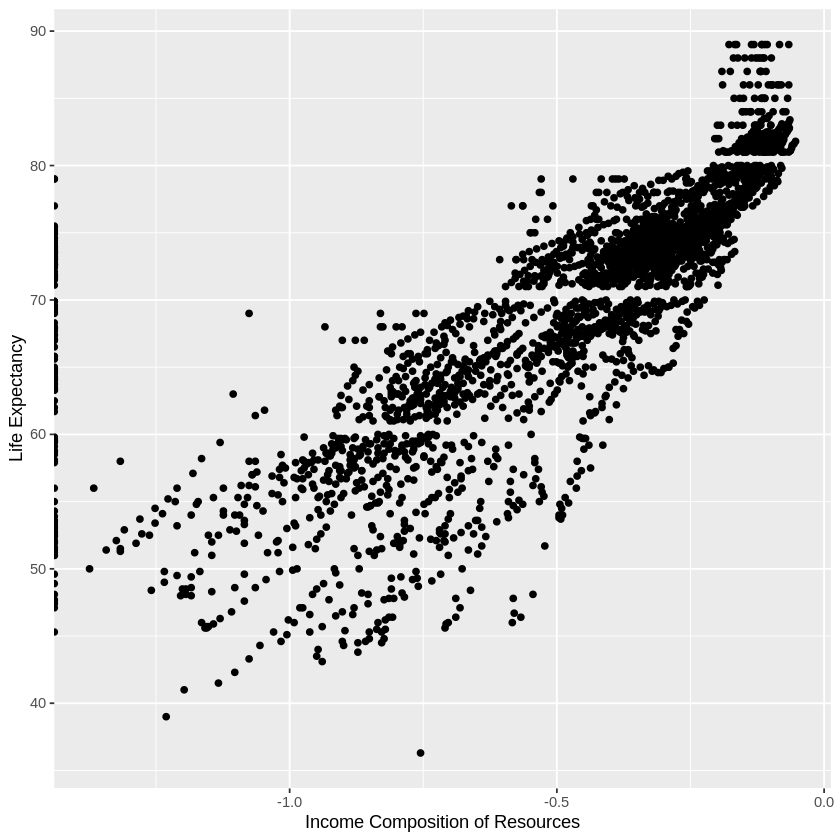

In [ ]:
ggplot(le, aes(x=log(`Income Composition of Resources`), y=`Life Expectancy`)) + geom_point() + labs(x="Income Composition of Resources", y="Life Expectancy")
cor.test(y=le$`Life Expectancy`, x=le$`Income Composition of Resources`, method = "pearson")

## Regression

In [46]:
intercept_only <- lm(`Life Expectancy` ~ 1,data = le[complete.cases(le[3:22]),])

In [47]:
predictors <- lm(`Life Expectancy` ~
  Status+
  `Adult Mortality`+
  `Infant Deaths`+
  `Percentage Expenditure`+
  BMI+
  `Under-five Deaths`+
  Polio+
  Diphtheria+
  `HIV/AIDS`+
  GDP+
  ThinnessAyears+
  ThinnessByears+
  `Income Composition of Resources`+
  Schooling,data=le[complete.cases(le[3:22]),])

In [36]:
model1 <- lm(`Life Expectancy` ~
  `Adult Mortality`+
  ThinnessByears+
  GDP+
  `HIV/AIDS`+
  Schooling+
  `Income Composition of Resources`,data=le)

In [50]:
model2 <- lm(`Life Expectancy` ~
  Status+
  `Adult Mortality`+
  `Infant Deaths`+
  `Percentage Expenditure`+
  BMI+
  `Under-five Deaths`+
  Polio+
  Diphtheria+
  `HIV/AIDS`+
  ThinnessAyears+
  `Income Composition of Resources`+
  Schooling,data=le)

In [51]:
summary(model2)


Call:
lm(formula = `Life Expectancy` ~ Status + `Adult Mortality` + 
    `Infant Deaths` + `Percentage Expenditure` + BMI + `Under-five Deaths` + 
    Polio + Diphtheria + `HIV/AIDS` + ThinnessAyears + `Income Composition of Resources` + 
    Schooling, data = le)

Residuals:
     Min       1Q   Median       3Q      Max 
-19.2955  -2.1240  -0.0719   2.1326  15.0807 

Coefficients:
                                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)                        5.944e+01  5.607e-01 106.017  < 2e-16 ***
StatusDeveloping                  -2.239e+00  2.479e-01  -9.031  < 2e-16 ***
`Adult Mortality`                 -1.704e-02  7.914e-04 -21.536  < 2e-16 ***
`Infant Deaths`                    9.304e-02  7.907e-03  11.766  < 2e-16 ***
`Percentage Expenditure`           3.891e-04  4.217e-05   9.229  < 2e-16 ***
BMI                                3.651e-02  4.929e-03   7.407 1.72e-13 ***
`Under-five Deaths`               -6.954e-02  5.821e-03 -11.946  < 2e-16 ***

In [48]:
forward <- step(intercept_only, direction="forward", scope = formula(predictors), trace=0)

In [49]:
forward$anova

Step,Df,Deviance,Resid. Df,Resid. Dev,AIC
<I<chr>>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
,NA,NA,1648,127529.31,7172.144
+ `Income Composition of Resources`,-1,66310.1542,1647,61219.16,5963.966
+ `Adult Mortality`,-1,23334.3673,1646,37884.79,5174.594
+ `HIV/AIDS`,-1,7526.4427,1645,30358.35,4811.376
+ Schooling,-2,3303.2273,1643,27055.12,4625.419
+ `Percentage Expenditure`,-1,1569.6890,1642,25485.43,4528.860
+ BMI,-1,998.6885,1641,24486.74,4464.941
+ Diphtheria,-1,526.2540,1640,23960.49,4431.115
+ Status,-1,272.0420,1639,23688.45,4414.286
